In [1]:
from conf import databases, url, data_dir, architecture_1
from file_utils import create_folder
from nn import LasagneNN
from prepostproc import shuffled_examples

import numpy
import random
import time

import lasagne
from matplotlib import pyplot as plt
import matplotlib as mpl

Using gpu device 0: GeForce GTX 1050 Ti (CNMeM is enabled with initial size: 95.0% of memory, cuDNN 5110)
/home/jdu/anac3.5/lib/python3.5/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


In [2]:
# print(databases)
# only = ['mitdb', 'ltdb', 'ltafdb', 'ltstdb']
# dbs = [(db, ids) for (db, ids) in databases if db in only]
# print(dbs)

In [20]:
fs = 128
fs_target = 360
min_bpm = 10
max_bpm = 350
min_gap = fs*60/min_bpm
max_gap = fs*60/max_bpm

train_perc = 99.95
test_perc = 100 - train_perc

params = {
    'fs_target': 360,
    'segment_size': 5000, 
    'segment_step': 2500, 
    'normalize_steps': True,
    'correct_peaks': True,
    'left_border': 100, # samples
    'right_border': 100, # samples
    'min_gap': min_gap,
    'max_gap': max_gap,
    'data_dir': data_dir
}

In [9]:
model_path = 'saved-models/' + '_'.join(sorted([n for n, _ in databases]))
create_folder(model_path)
save_name = model_path + time.strftime("%Y-%m-%d-%H-%M")
print(save_name)

saved-models/ltafdb_ltdb_mitdb_nsrdb_stdb_svdb2017-05-23-22-51


In [4]:
nn = LasagneNN(architecture_1, dim=1, params=params)

Model shape:
  Layer 0:
    - size: 3	num: 8
    - size: 15	num: 64
    - size: 45	num: 64
    - size: 89	num: 32
    - size: 149	num: 16
    - size: 199	num: 16
    - size: 299	num: 16
    - dropout: 0.5
  Layer 1:
    - size: 3	num: 8
    - size: 9	num: 64
    - size: 19	num: 64
    - size: 39	num: 64
    - dropout: 0.5
  Layer 2:
    - size: 3	num: 8
    - size: 5	num: 32
    - size: 9	num: 32
    - size: 15	num: 32
    - size: 19	num: 32
    - dropout: 0.5
  Layer 3:
    - size: 3	num: 8
    - size: 5	num: 32
    - size: 15	num: 64
    - dropout: 0.5
  Layer 4:
    - size: 5	num: 16
    - size: 15	num: 16
    - size: 19	num: 16
    - dropout: 0.5
  Layer 5:
    - size: 3	num: 8
    - size: 9	num: 16
    - size: 15	num: 16
    - dropout: 0.5
Neural network initialized in 26.98s


In [21]:
exs = shuffled_examples(databases, params)
train_exs = exs[:int(len(exs)*train_perc/100)]
test_exs  = exs[int(len(exs)*train_perc/100):]

def get_timedelta_fmt(nb_ex, params):
    nb_samp = nb_ex * params['segment_size']
    seconds = nb_samp / params['fs_target']
    
    days, remainder = divmod(seconds, 86400)
    hours, remainder = divmod(remainder, 3600)
    minutes, seconds = divmod(remainder, 60)
    
    return '{:,} ({:,} samples, or {}days {}hours {}minutes {}seconds)'.format(
        nb_ex, nb_samp,int(days), int(hours), int(minutes), int(seconds))

print('Number of examples: ' + get_timedelta_fmt(len(exs), params))
print('          Training: ' + get_timedelta_fmt(len(train_exs), params))
print('           Testing: ' + get_timedelta_fmt(len(test_exs), params))

Number of examples: 1,328,782 (6,643,910,000 samples, or 213days 14hours 28minutes 25seconds)
          Training: 1,328,117 (6,640,585,000 samples, or 213days 11hours 54minutes 29seconds)
           Testing: 665 (3,325,000 samples, or 0days 2hours 33minutes 56seconds)


Training on 1328117 examples, testing on 665 examples.
Starting training...
Epoch 1/50 running...Done in 79.468s!
  - training loss:		2.681479
  - test loss:			0.359618 | 1.671408 | 2.031027
  - test accuracy:		99.6395 %


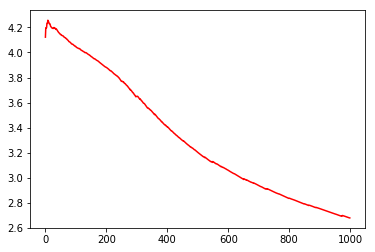

Evaluating...


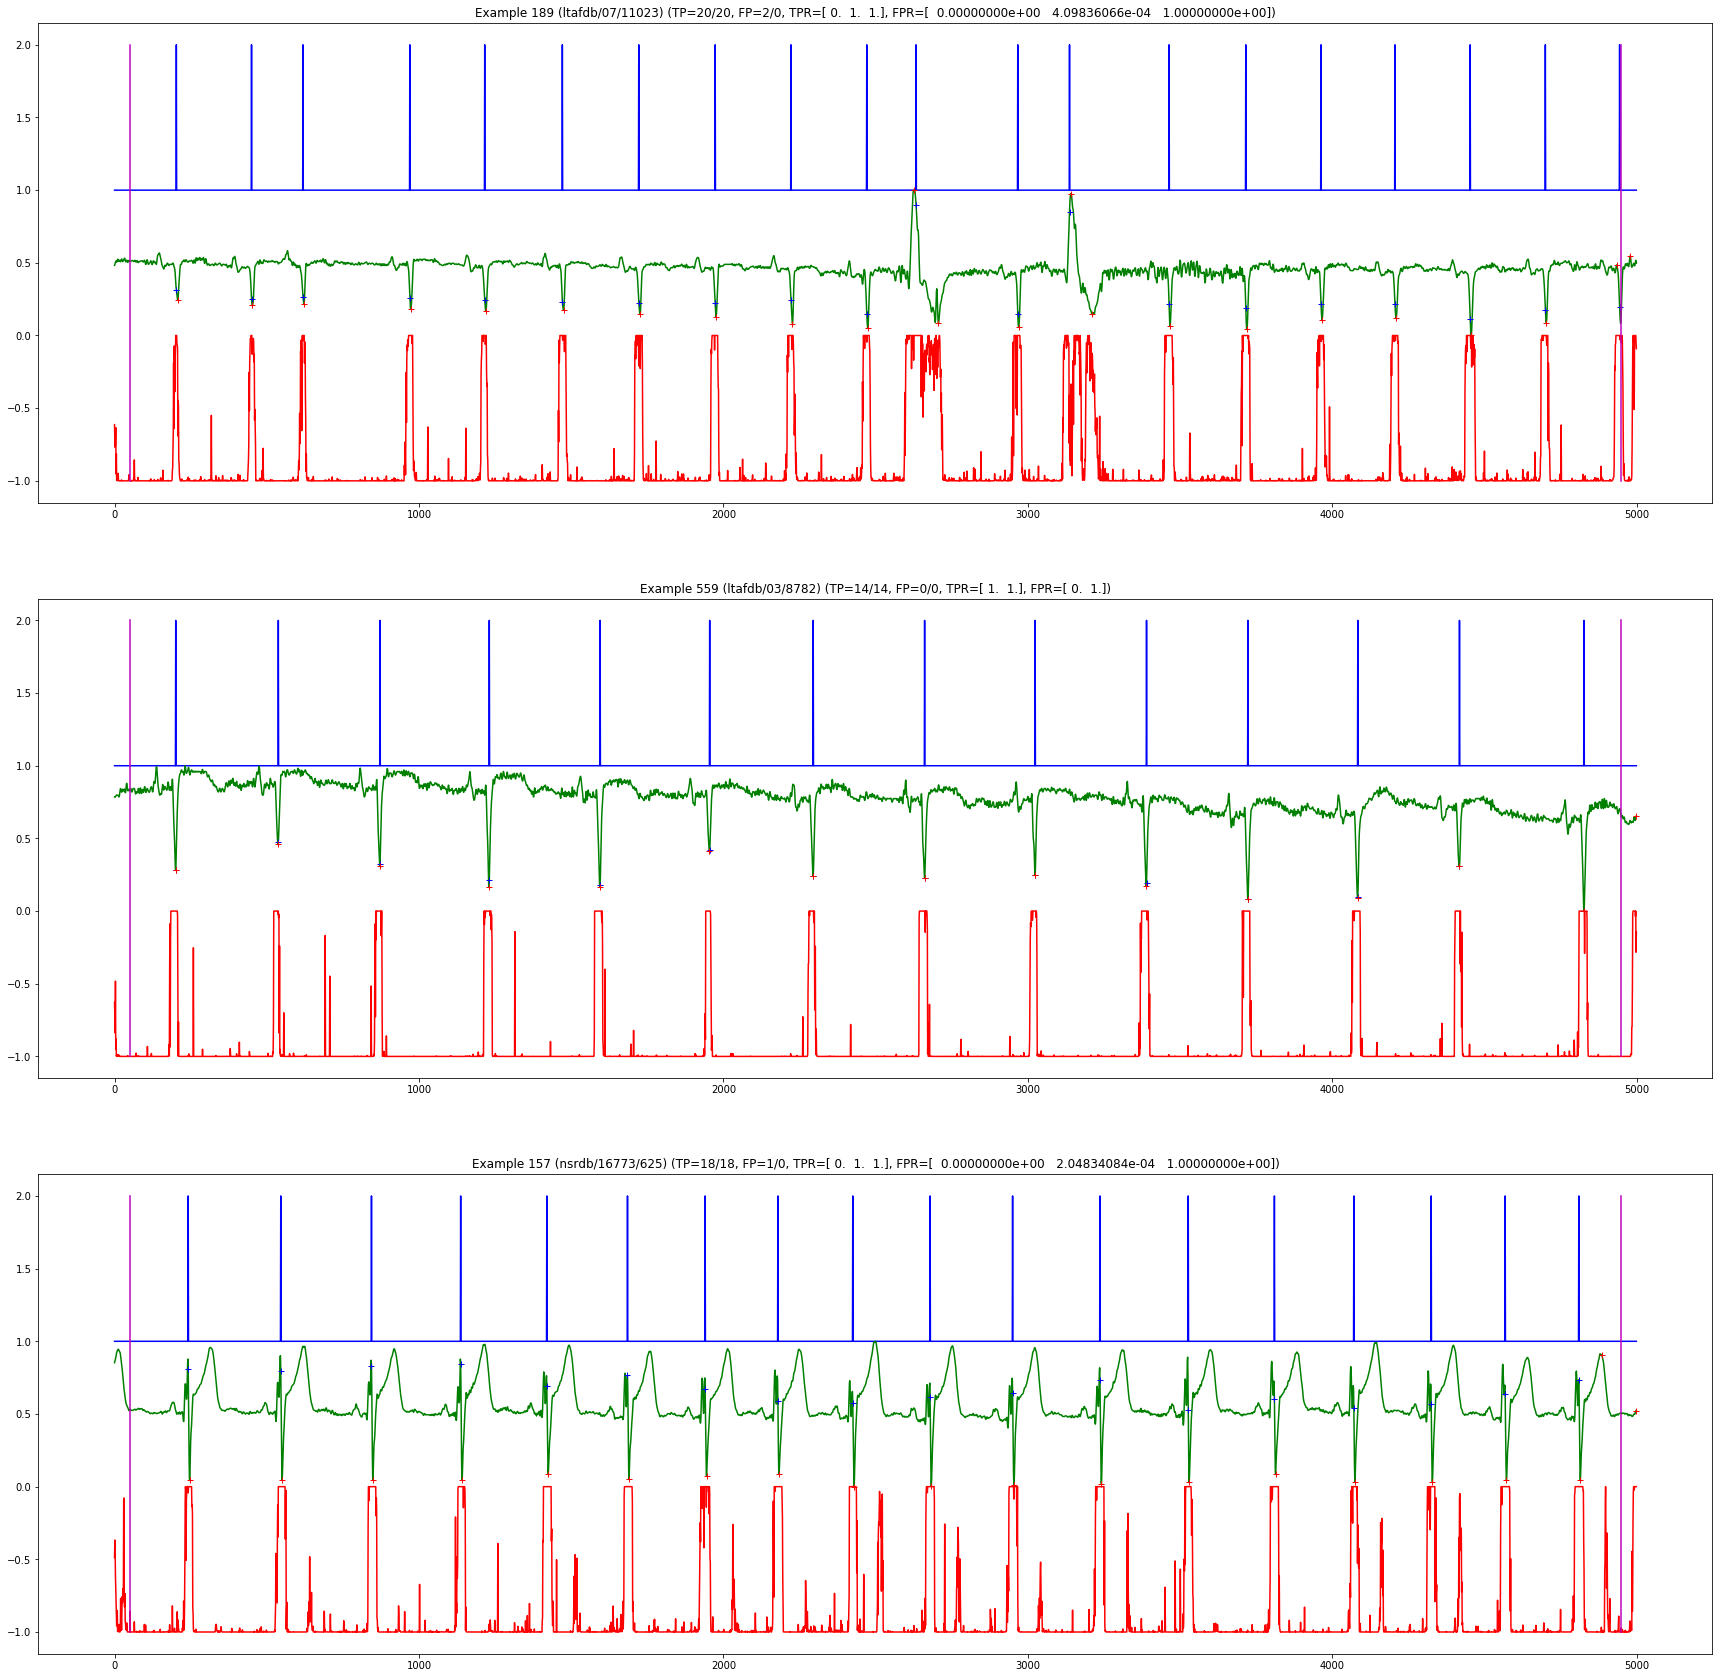

FPR			TPR			Threshold
0.004164		1.000000\+t	1.0000000


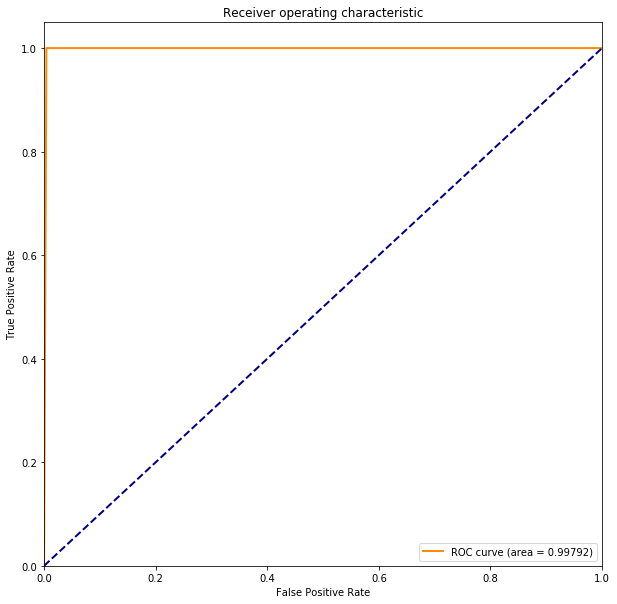

Samples:		14700 samples
Beats:
  - 52 labelized
  - 113 detected
  - TP:  52/52
  - FP:  61/0
  - TPR: 1.0000
Epoch 2/50 running...Done in 79.589s!
  - training loss:		1.720145
  - test loss:			0.265711 | 1.187539 | 1.453249
  - test accuracy:		99.6395 %


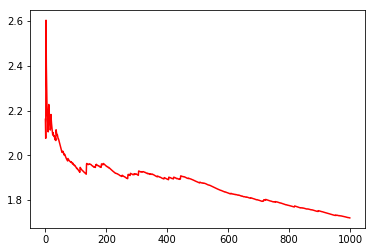

Evaluating...


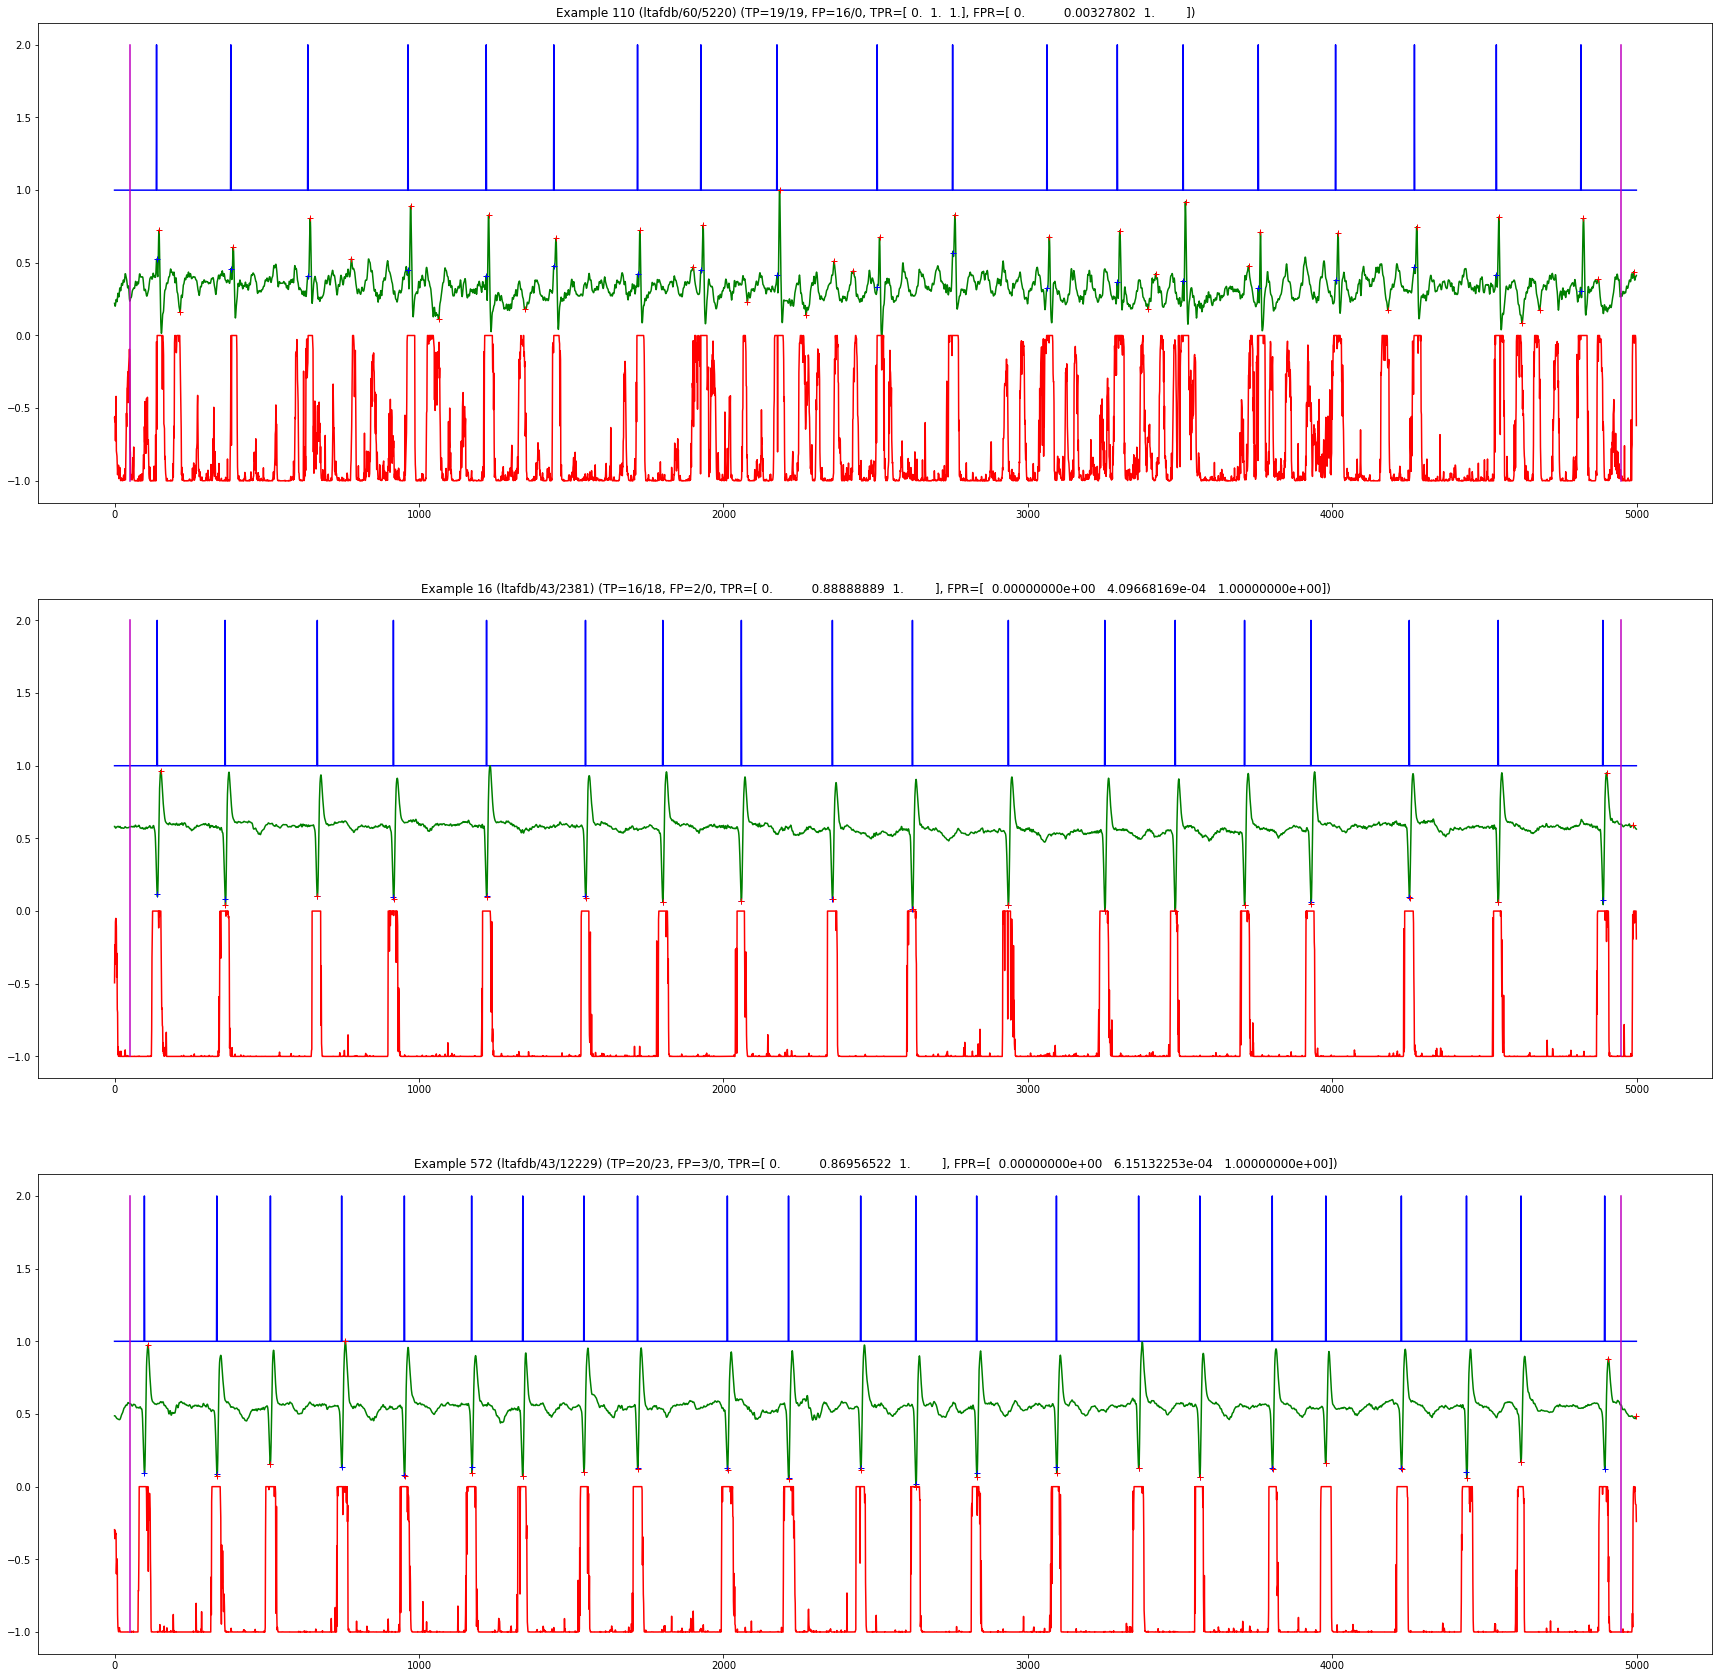

FPR			TPR			Threshold
0.015847		1.000000\+t	1.0000000


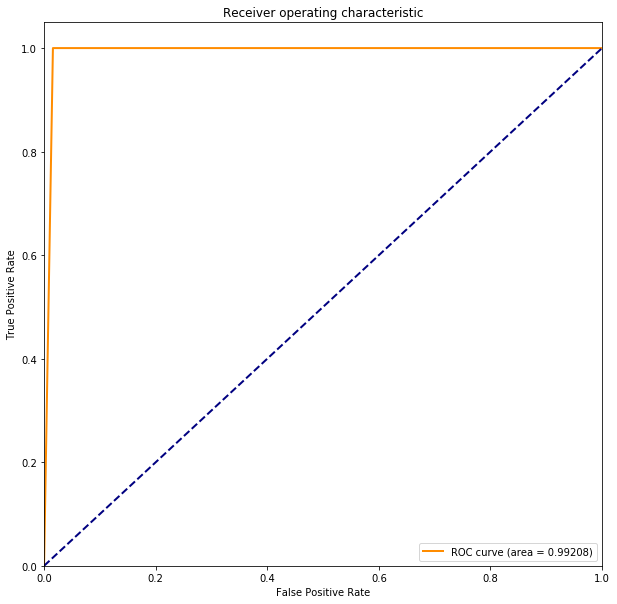

Samples:		14700 samples
Beats:
  - 60 labelized
  - 292 detected
  - TP:  60/60
  - FP:  232/0
  - TPR: 1.0000
Epoch 3/50 running...Done in 79.260s!
  - training loss:		1.302214
  - test loss:			0.241779 | 0.861016 | 1.102795
  - test accuracy:		99.6395 %


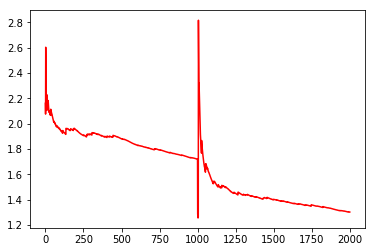

Evaluating...


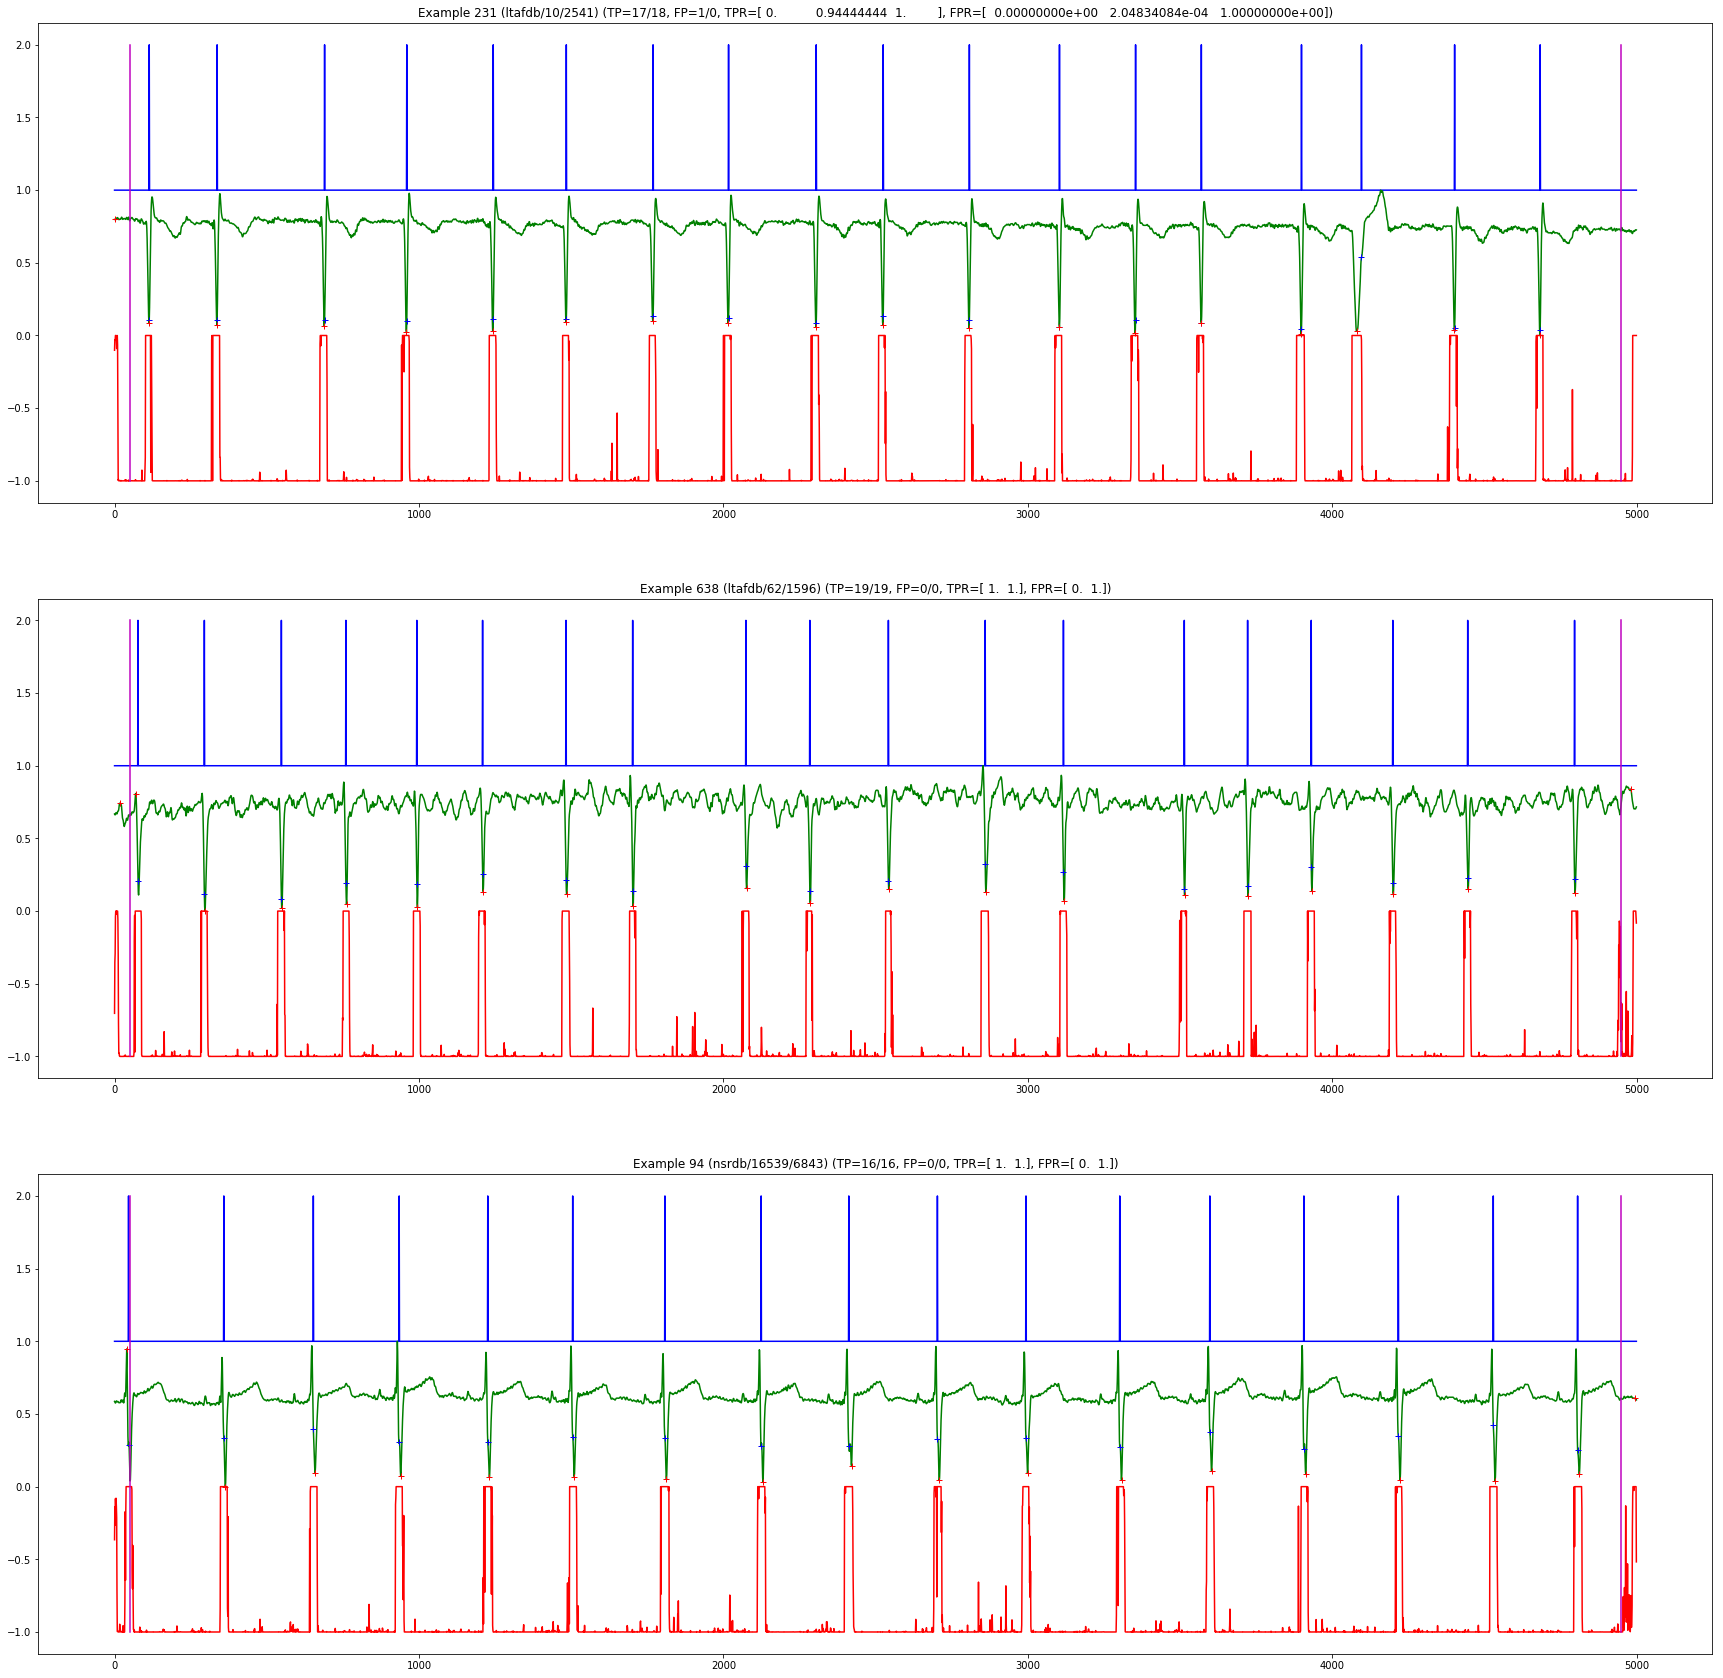

FPR			TPR			Threshold
0.001912		1.000000\+t	1.0000000


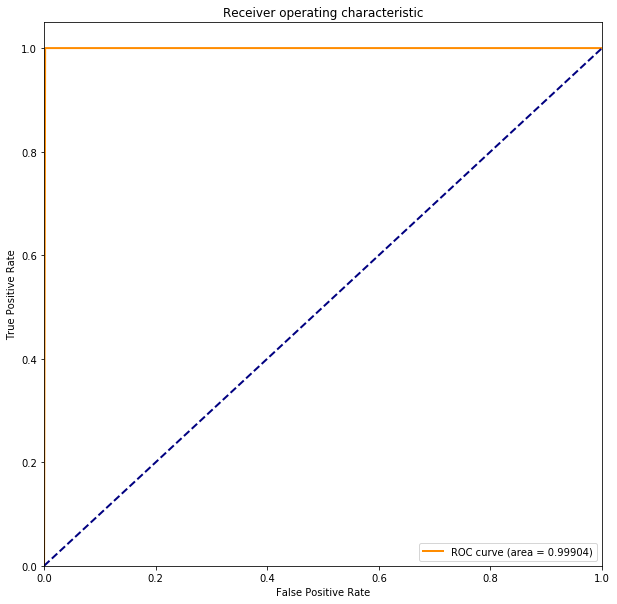

Samples:		14700 samples
Beats:
  - 53 labelized
  - 81 detected
  - TP:  53/53
  - FP:  28/0
  - TPR: 1.0000
Epoch 4/50 running...Done in 79.187s!
  - training loss:		1.008924
  - test loss:			0.223112 | 0.641313 | 0.864425
  - test accuracy:		99.6395 %


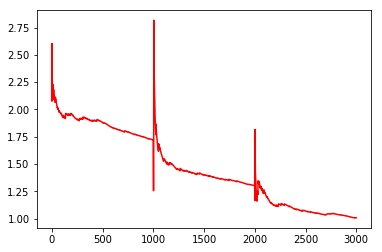

Evaluating...


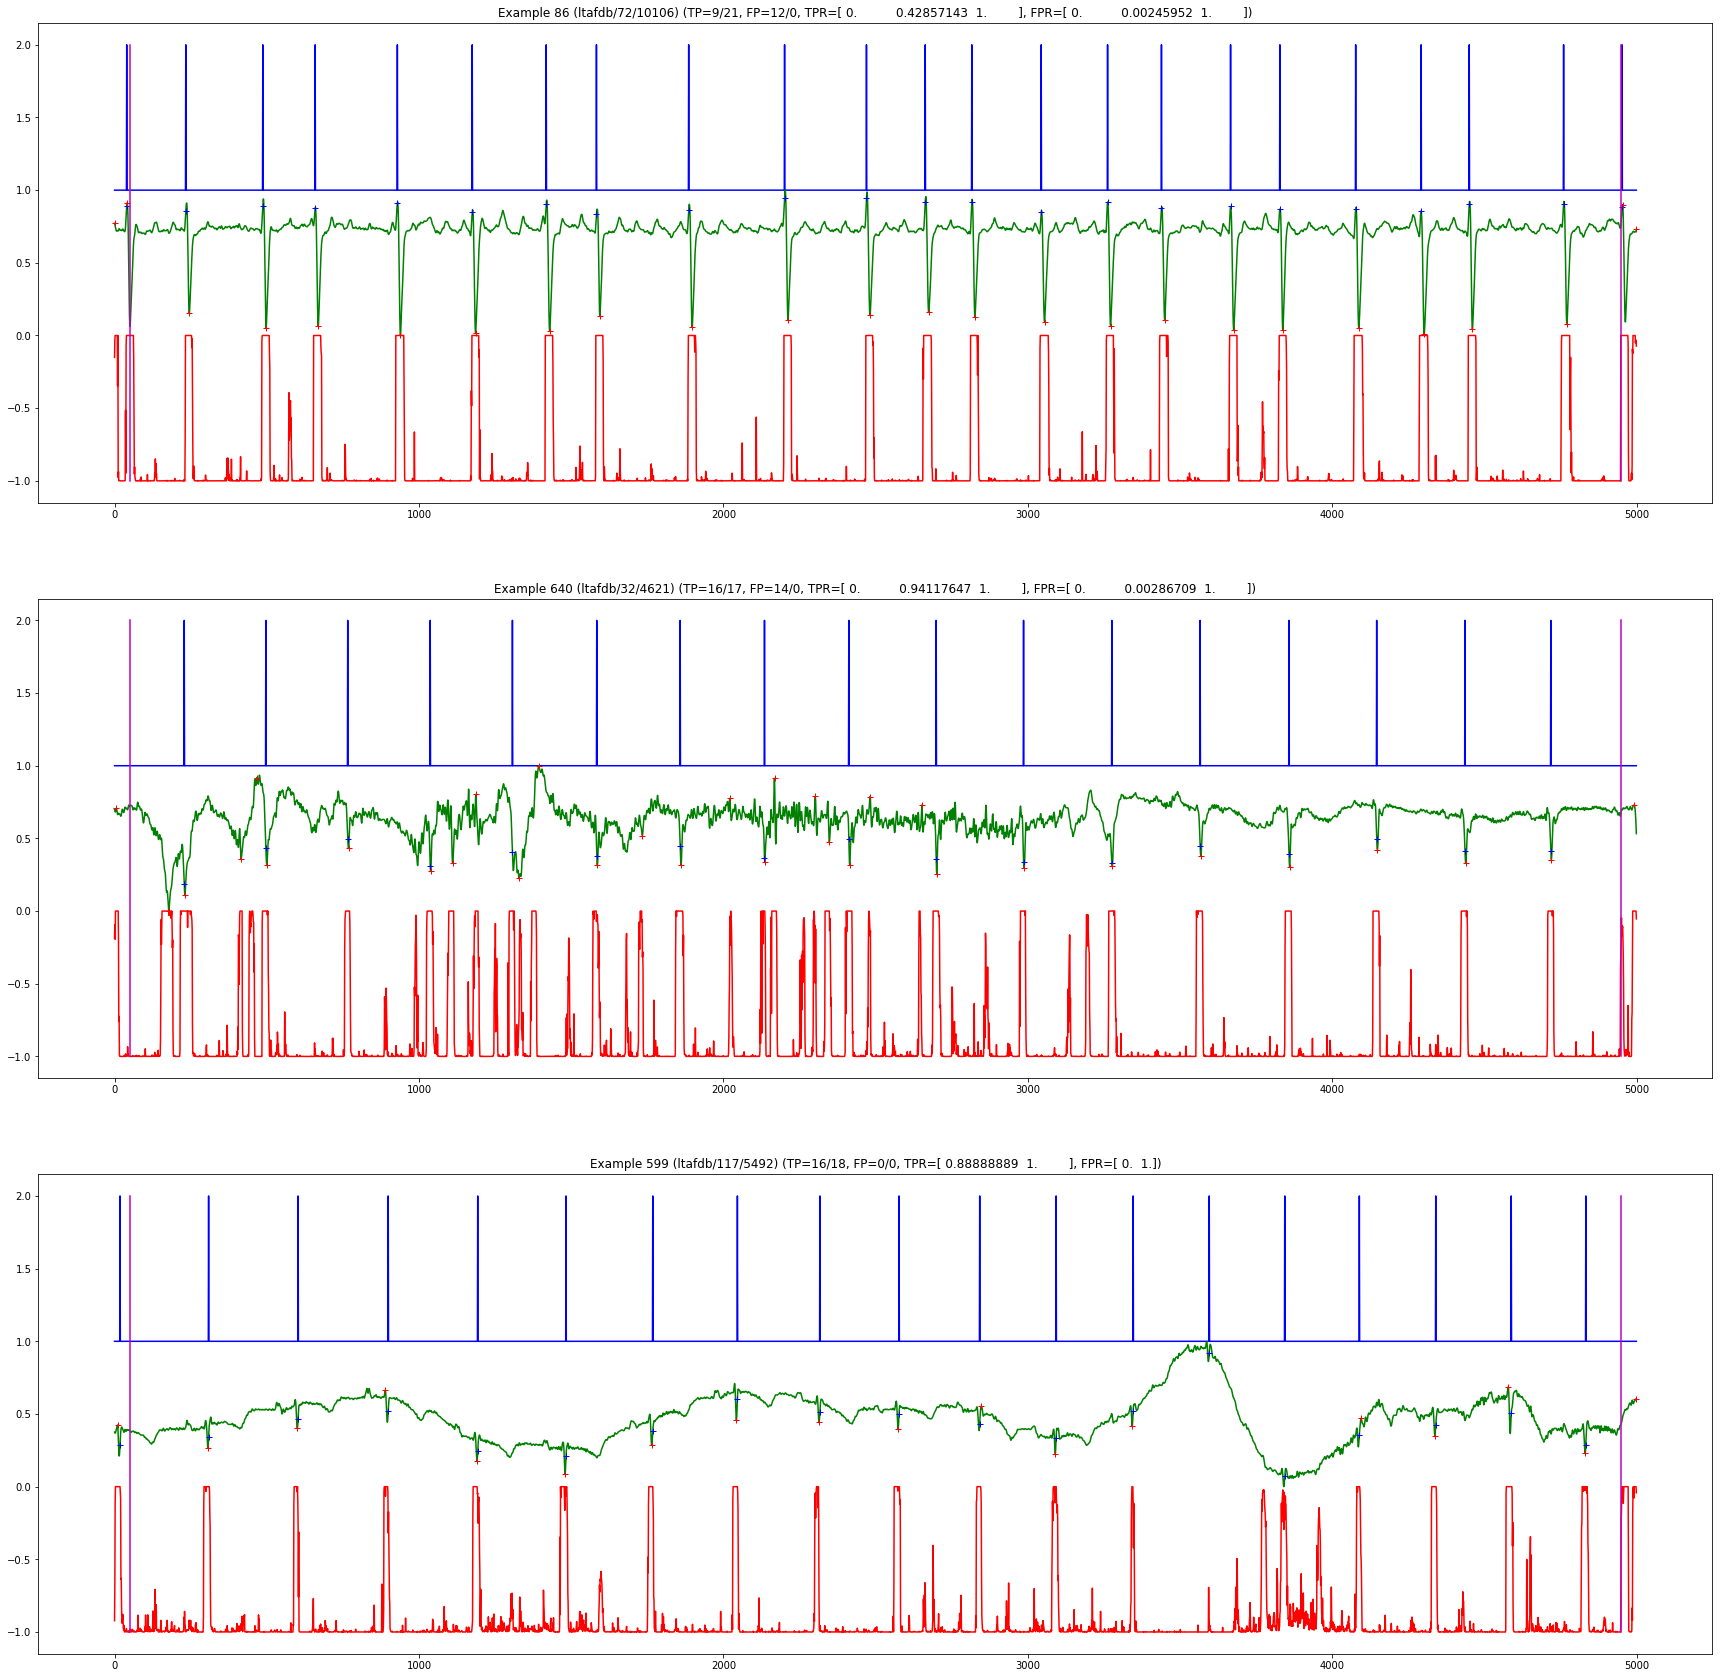

FPR			TPR			Threshold
0.013999		0.964286\+t	1.0000000


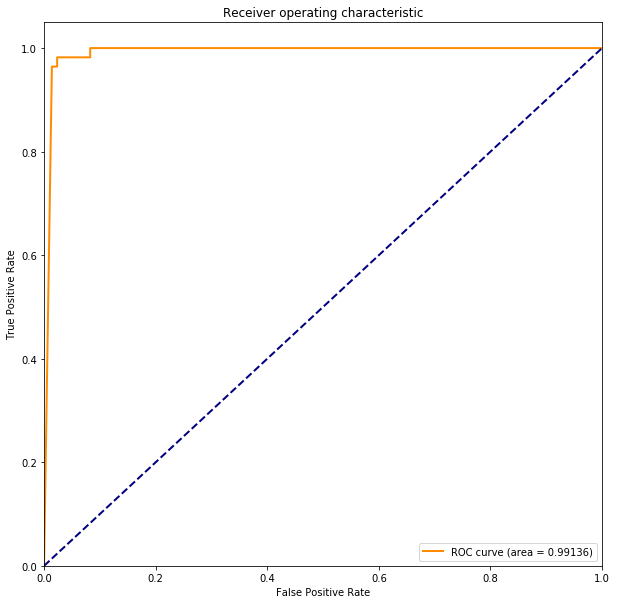

Samples:		14700 samples
Beats:
  - 56 labelized
  - 259 detected
  - TP:  54/56
  - FP:  205/0
  - TPR: 0.9643
Epoch 5/50 running...Done in 79.717s!
  - training loss:		0.828889
  - test loss:			0.232559 | 0.499690 | 0.732249
  - test accuracy:		99.6395 %


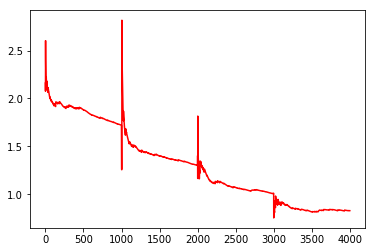

Evaluating...


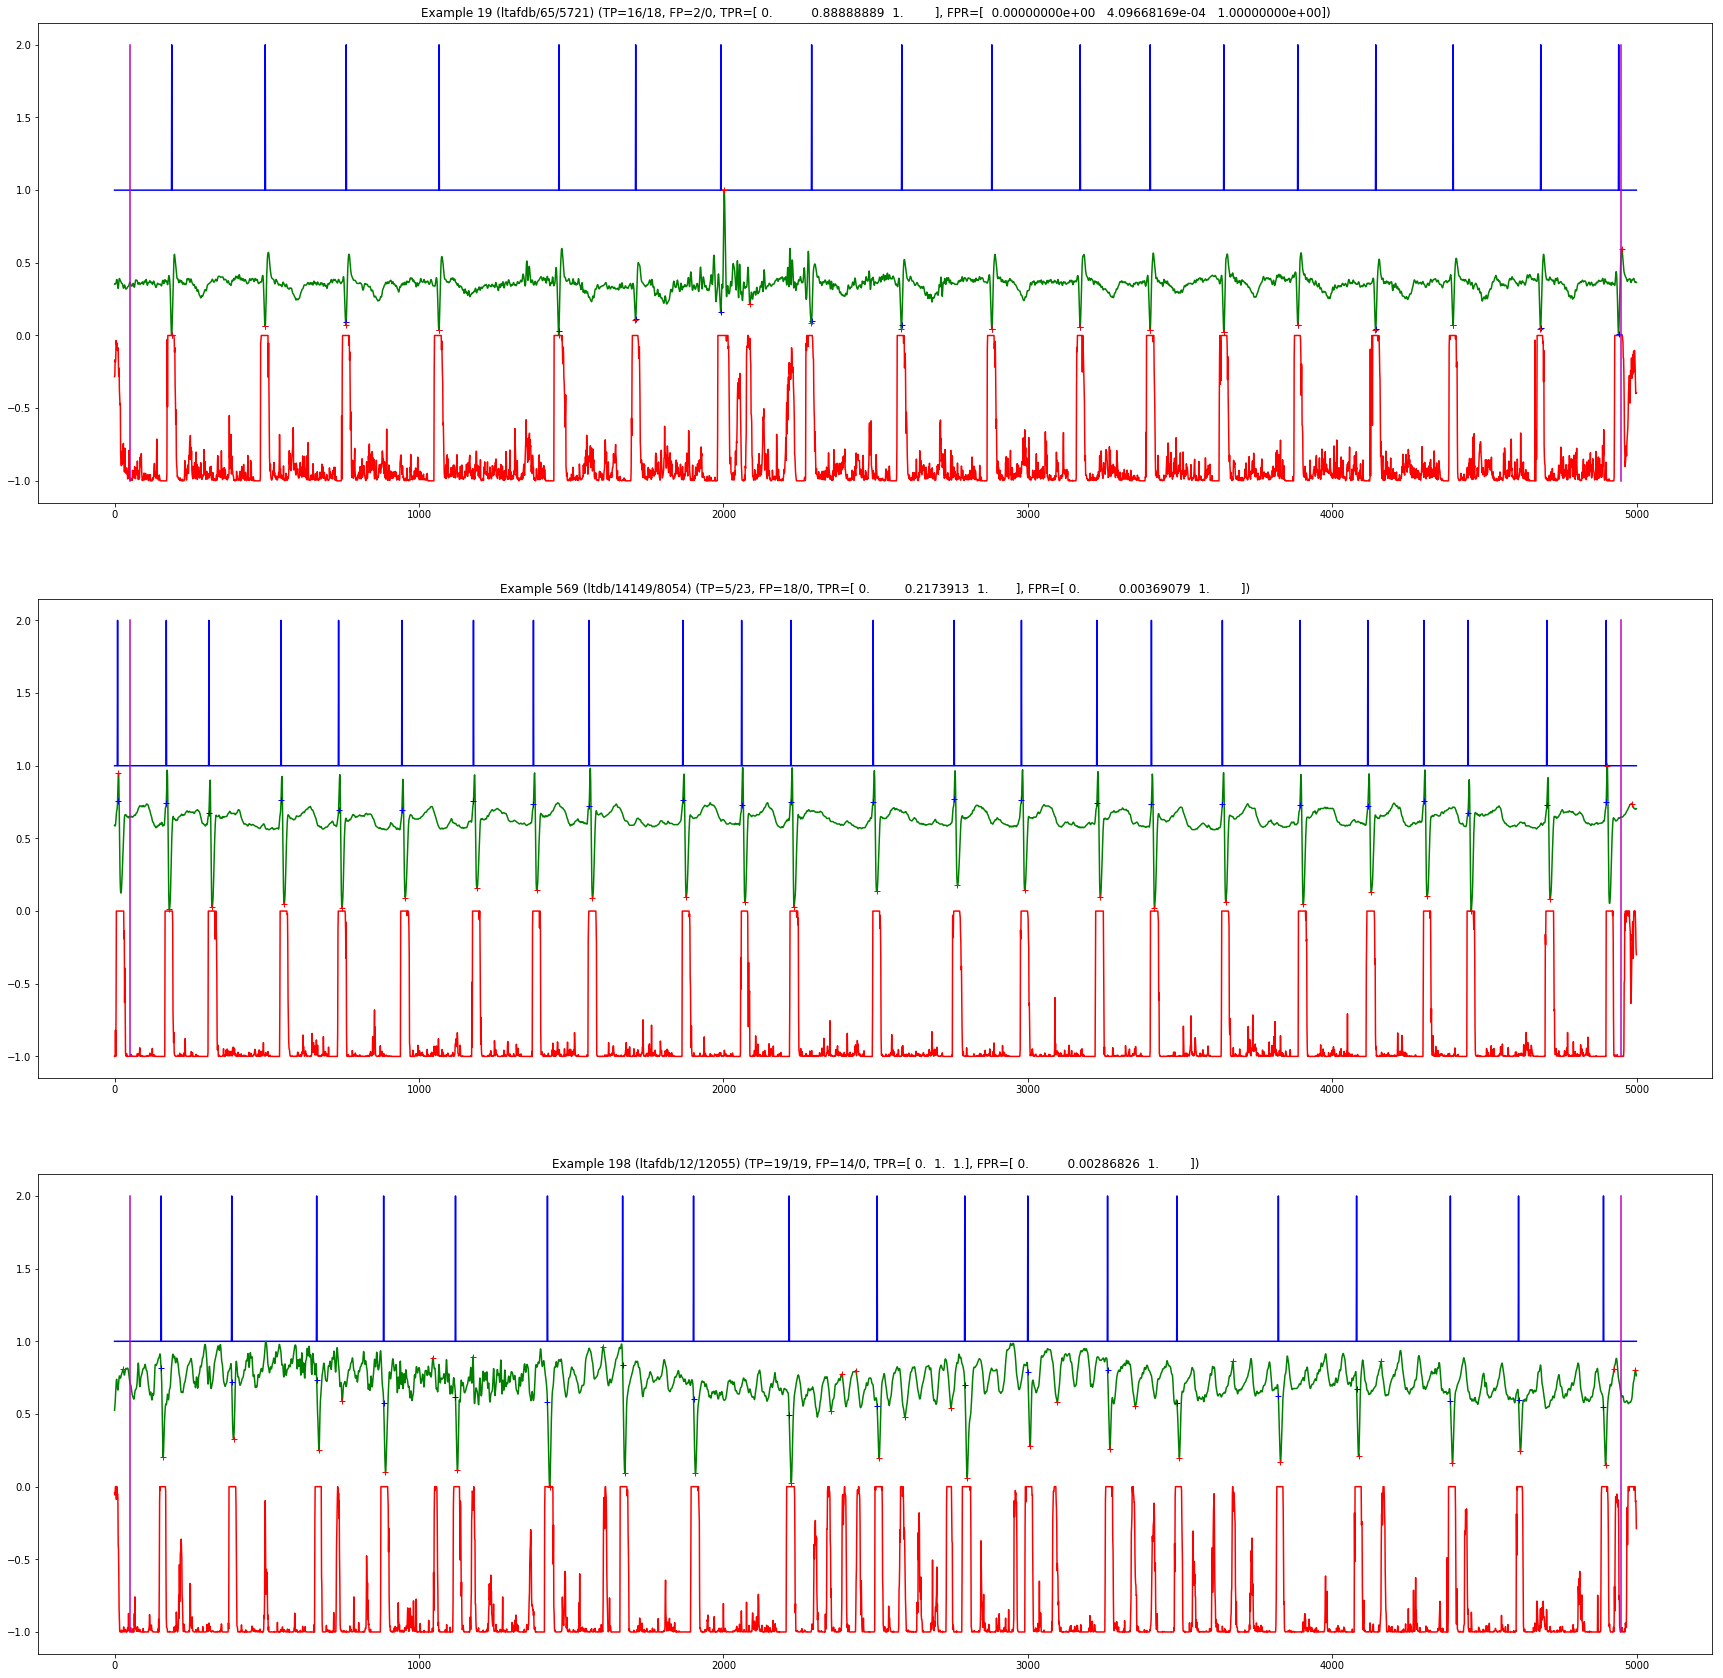

FPR			TPR			Threshold
0.009495		1.000000\+t	1.0000000


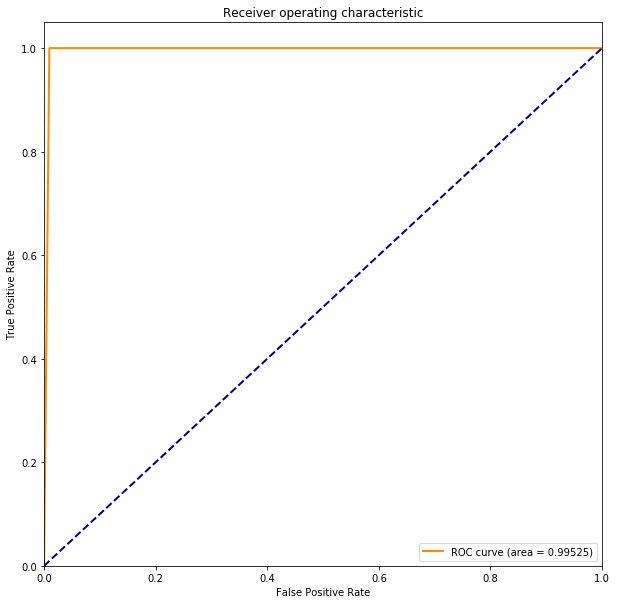

Samples:		14700 samples
Beats:
  - 60 labelized
  - 199 detected
  - TP:  60/60
  - FP:  139/0
  - TPR: 1.0000
Epoch 6/50 running...Done in 79.954s!
  - training loss:		0.684000
  - test loss:			0.249234 | 0.403957 | 0.653191
  - test accuracy:		99.6395 %


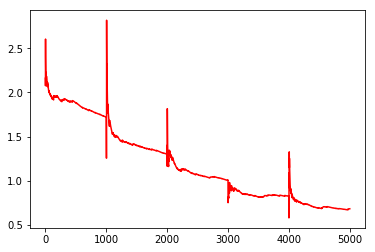

Evaluating...


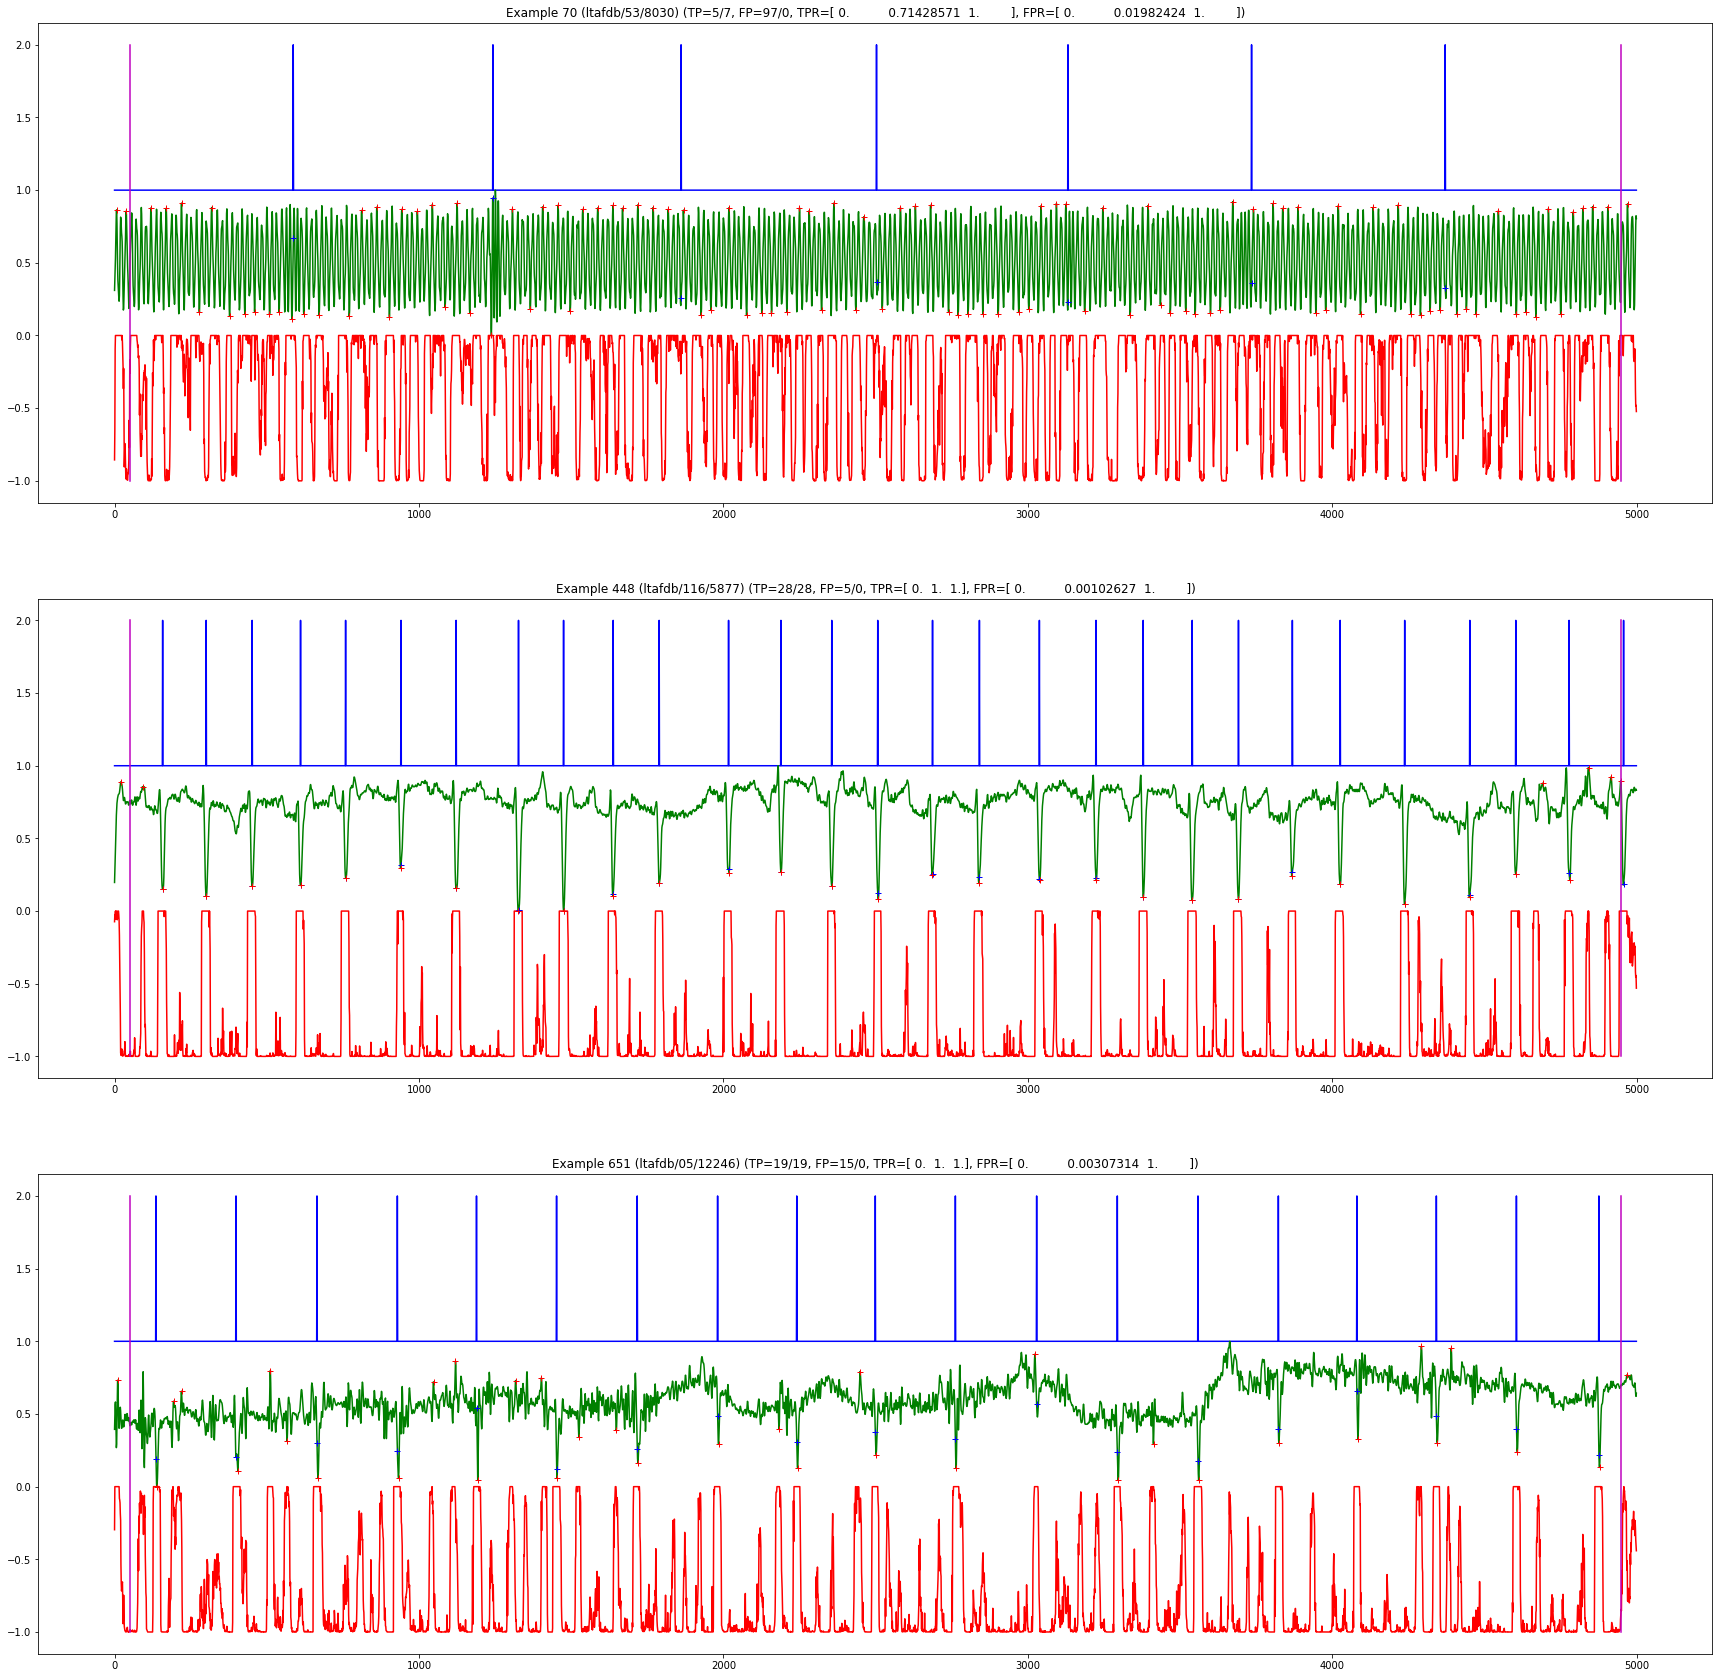

FPR			TPR			Threshold
0.000000		0.000000\+t	2.0000000


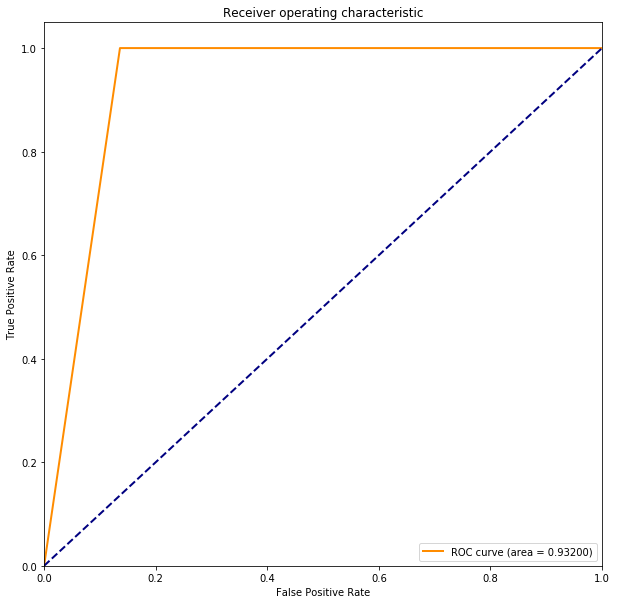

Samples:		14700 samples
Beats:
  - 54 labelized
  - 2046 detected
  - TP:  54/54
  - FP:  1992/0
  - TPR: 1.0000
Epoch 7/50 running...Done in 79.444s!
  - training loss:		0.583181
  - test loss:			0.224892 | 0.329470 | 0.554362
  - test accuracy:		99.6395 %


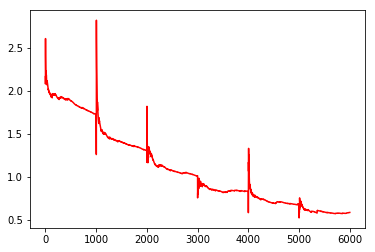

Evaluating...


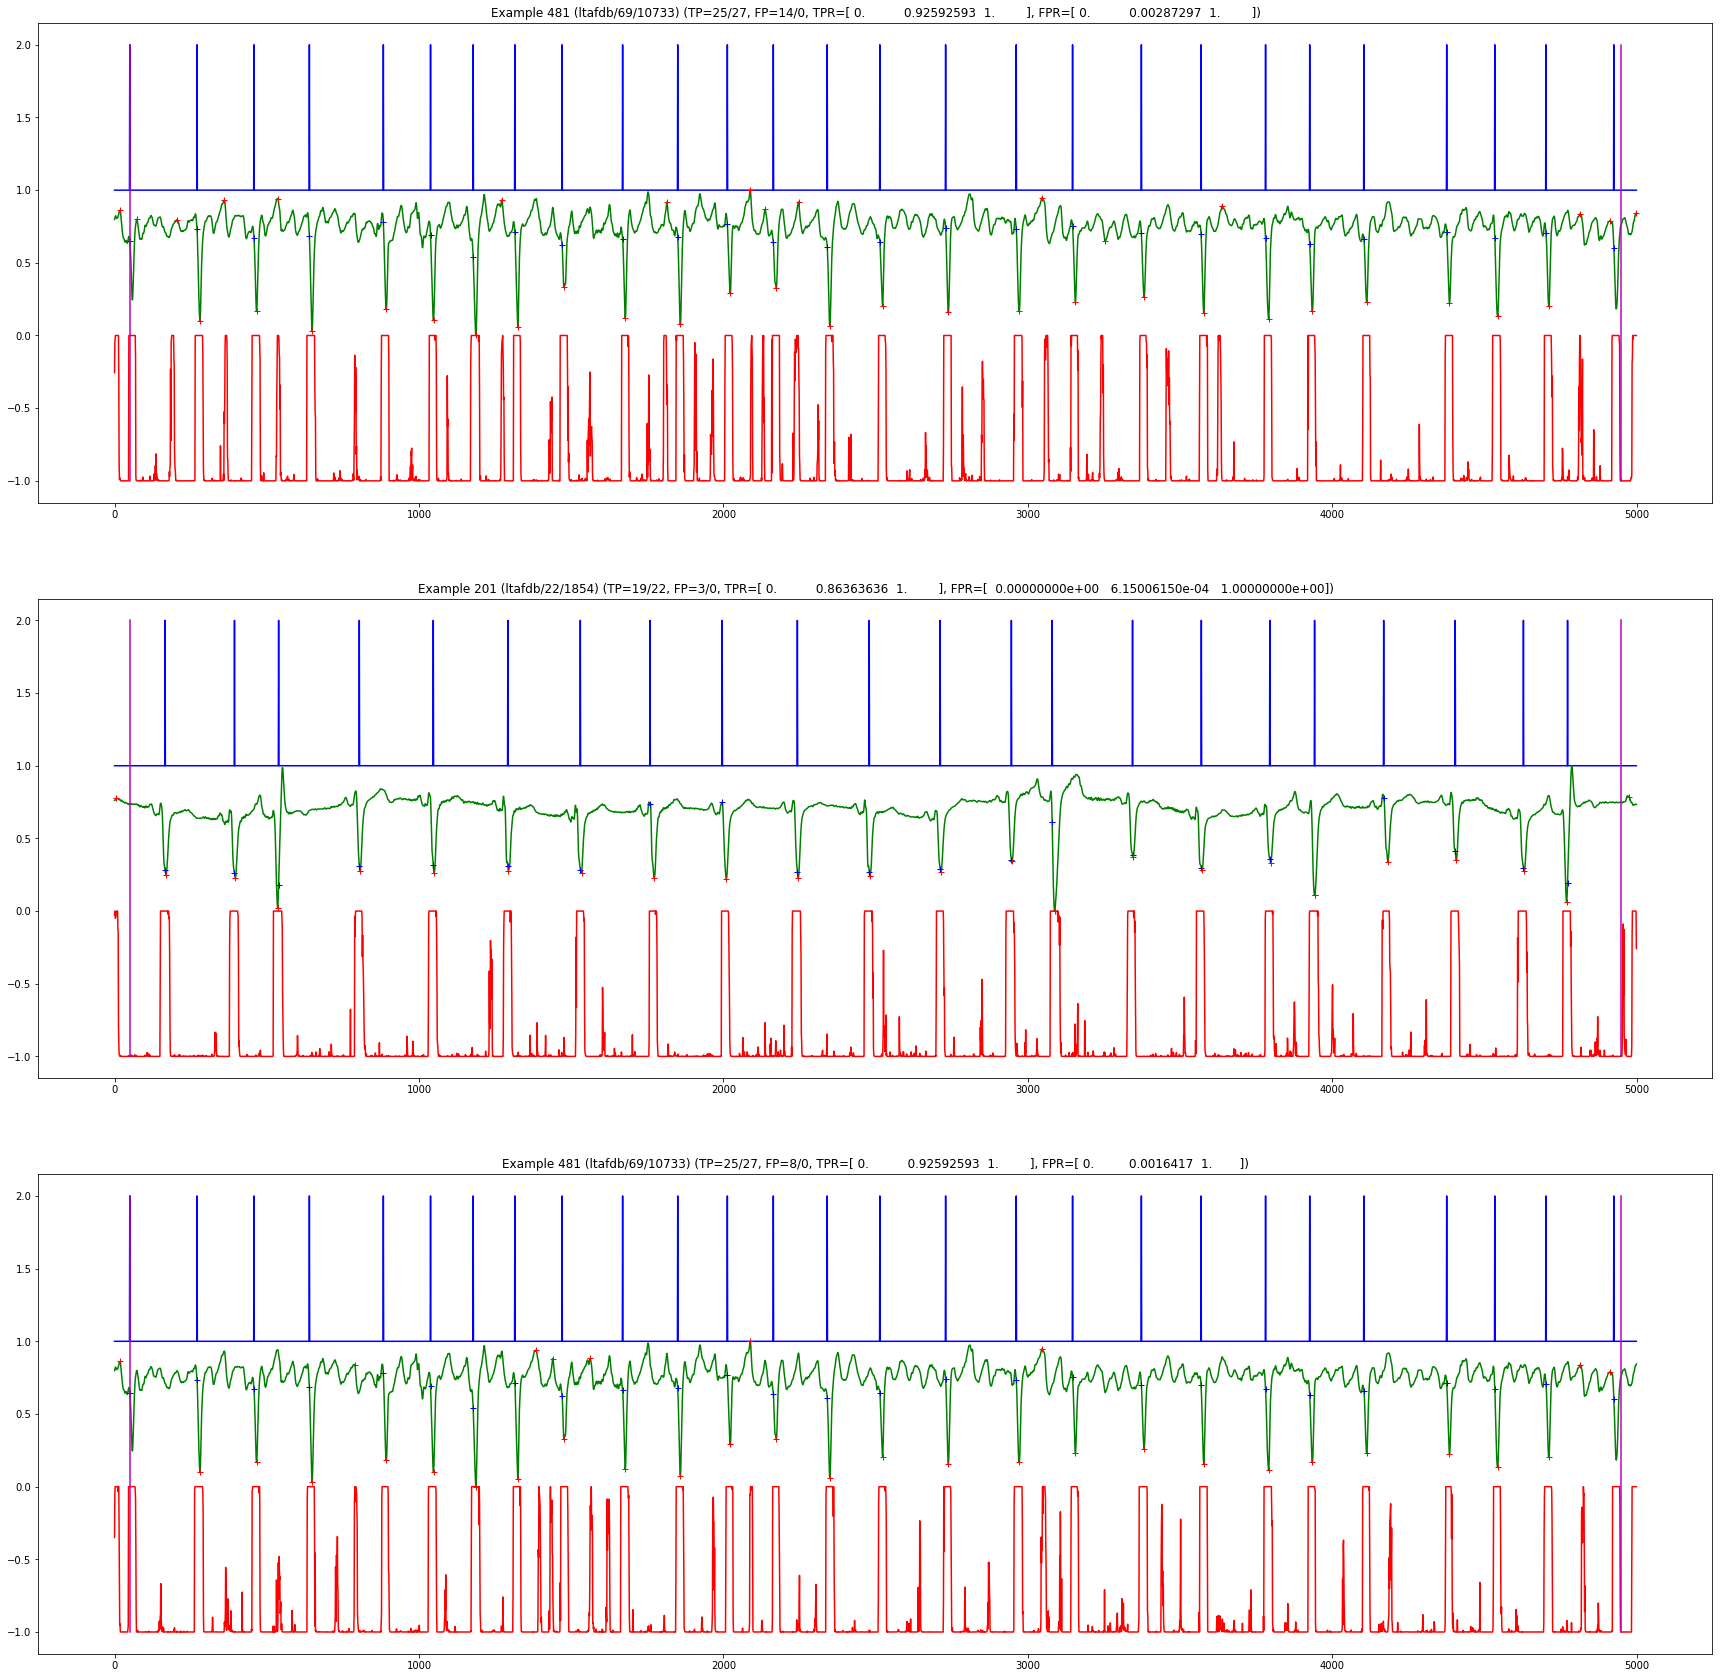

FPR			TPR			Threshold
0.011625		1.000000\+t	1.0000000


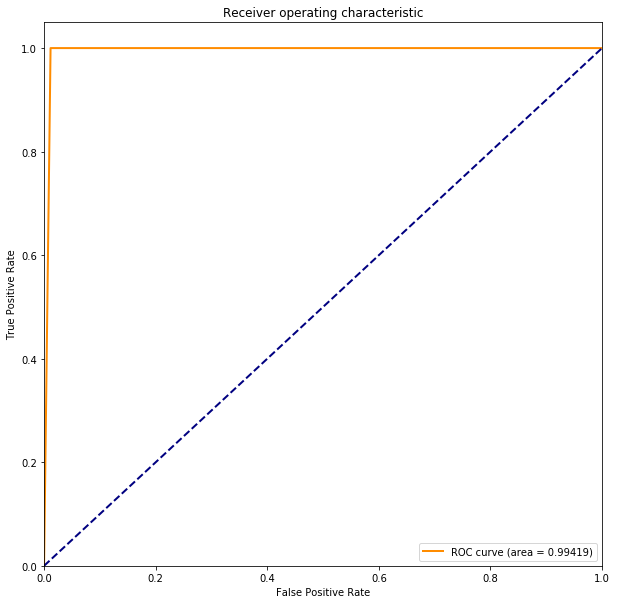

Samples:		14700 samples
Beats:
  - 76 labelized
  - 246 detected
  - TP:  76/76
  - FP:  170/0
  - TPR: 1.0000
Epoch 8/50 running...Done in 79.234s!
  - training loss:		0.520757
  - test loss:			0.234324 | 0.273437 | 0.507761
  - test accuracy:		99.6395 %


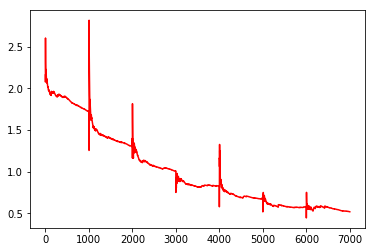

Evaluating...


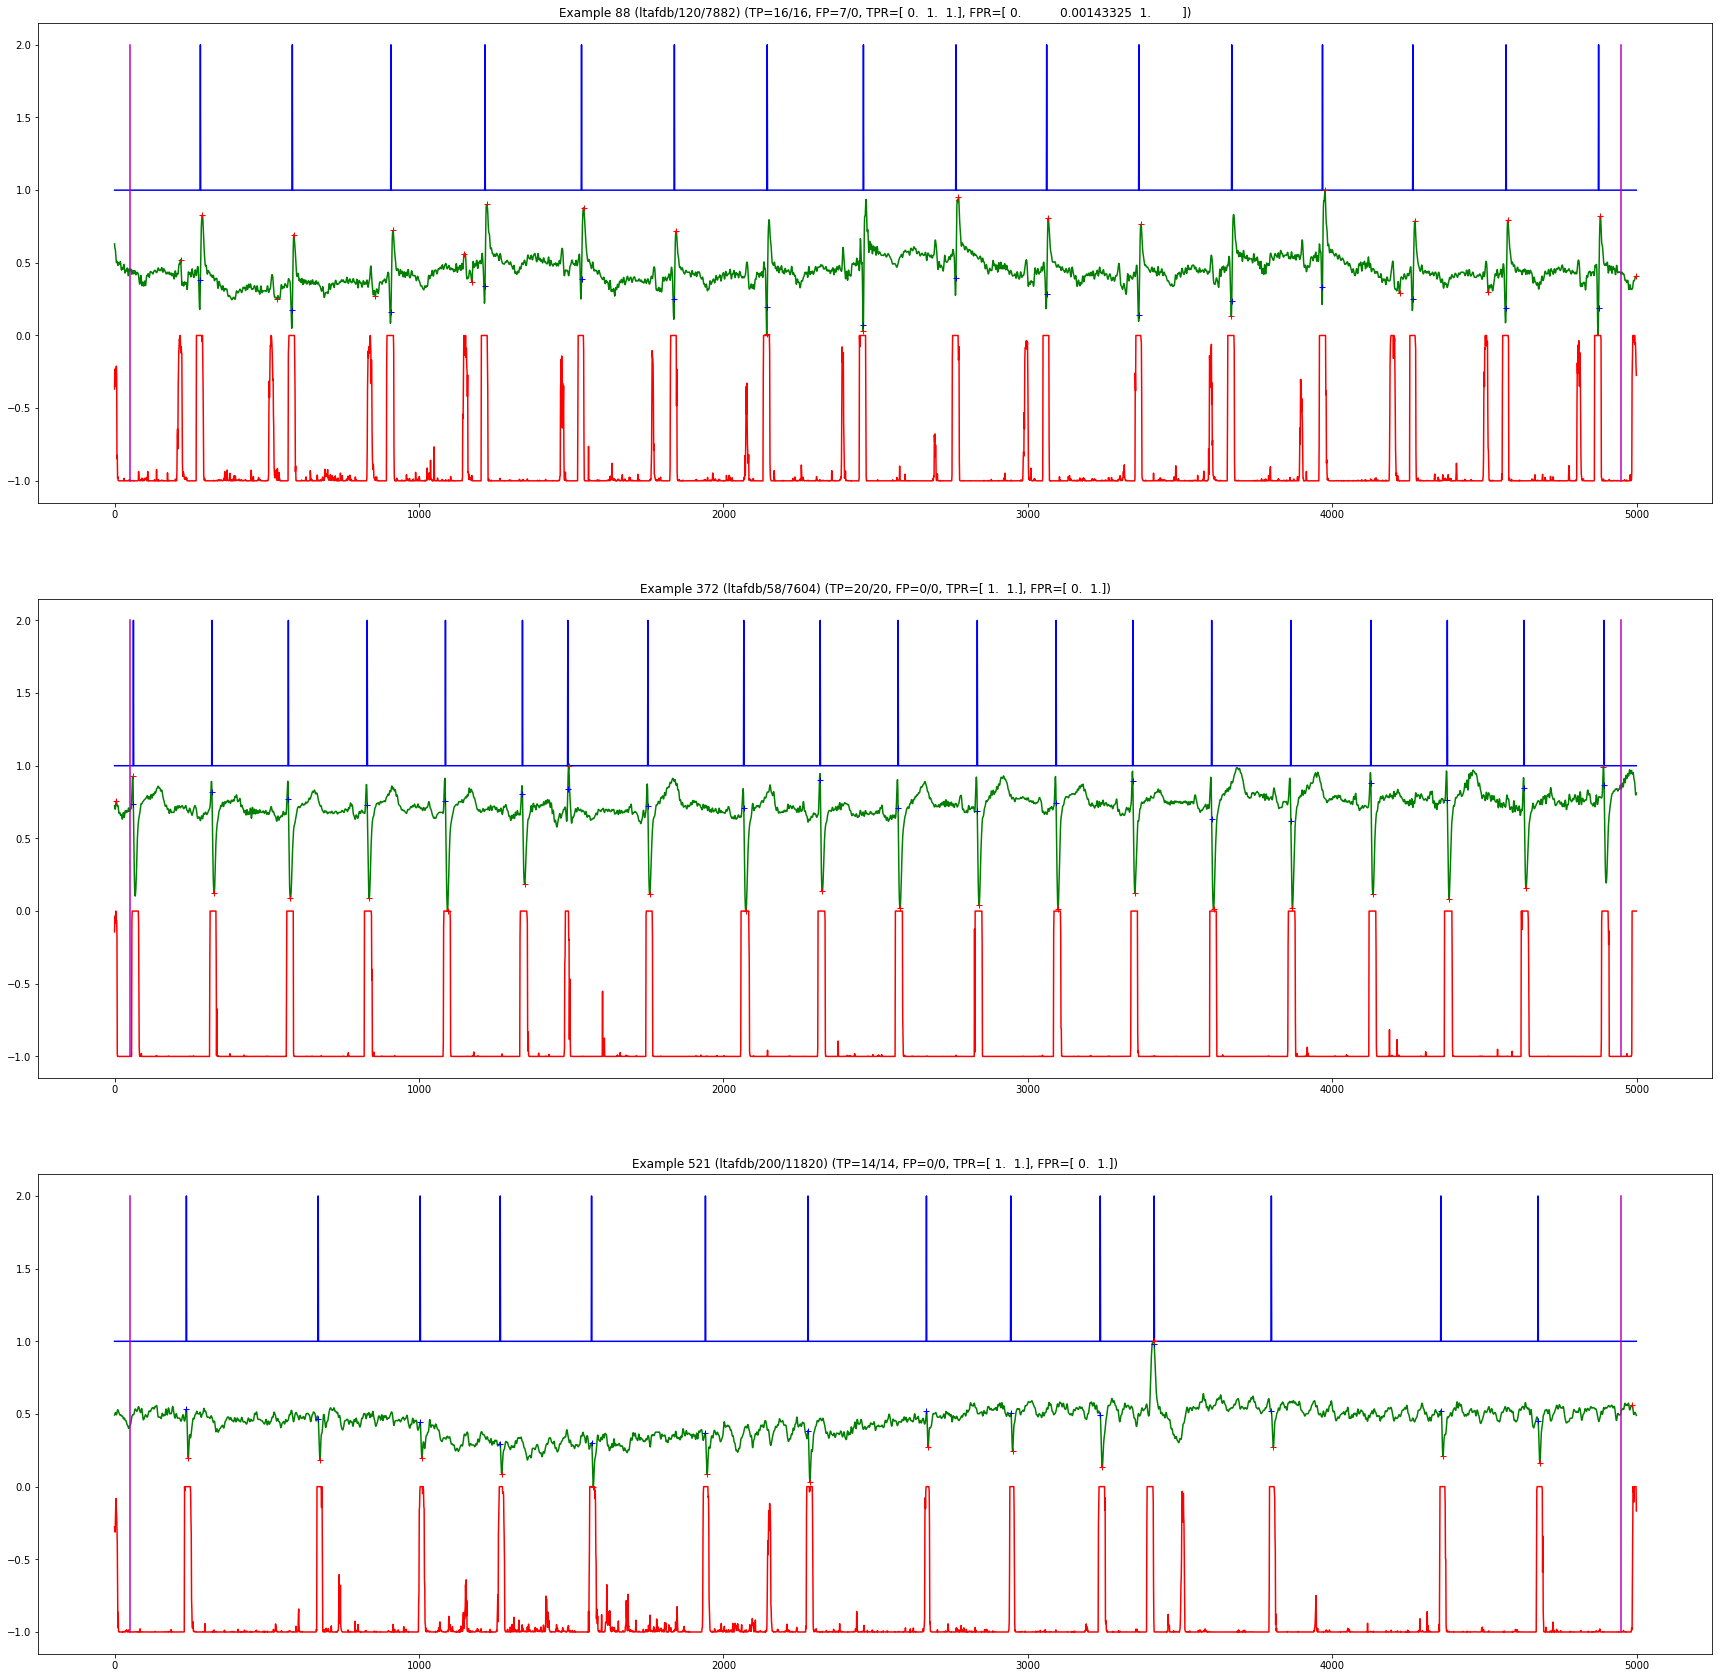

FPR			TPR			Threshold
0.002526		1.000000\+t	1.0000000


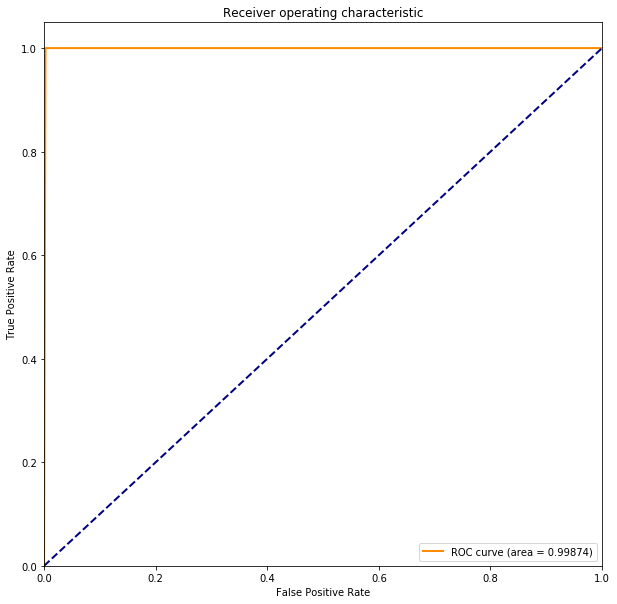

Samples:		14700 samples
Beats:
  - 50 labelized
  - 87 detected
  - TP:  50/50
  - FP:  37/0
  - TPR: 1.0000
Epoch 9/50 running...Done in 79.507s!
  - training loss:		0.480683
  - test loss:			0.261739 | 0.236509 | 0.498248
  - test accuracy:		99.6395 %


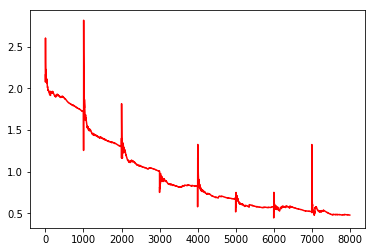

Evaluating...


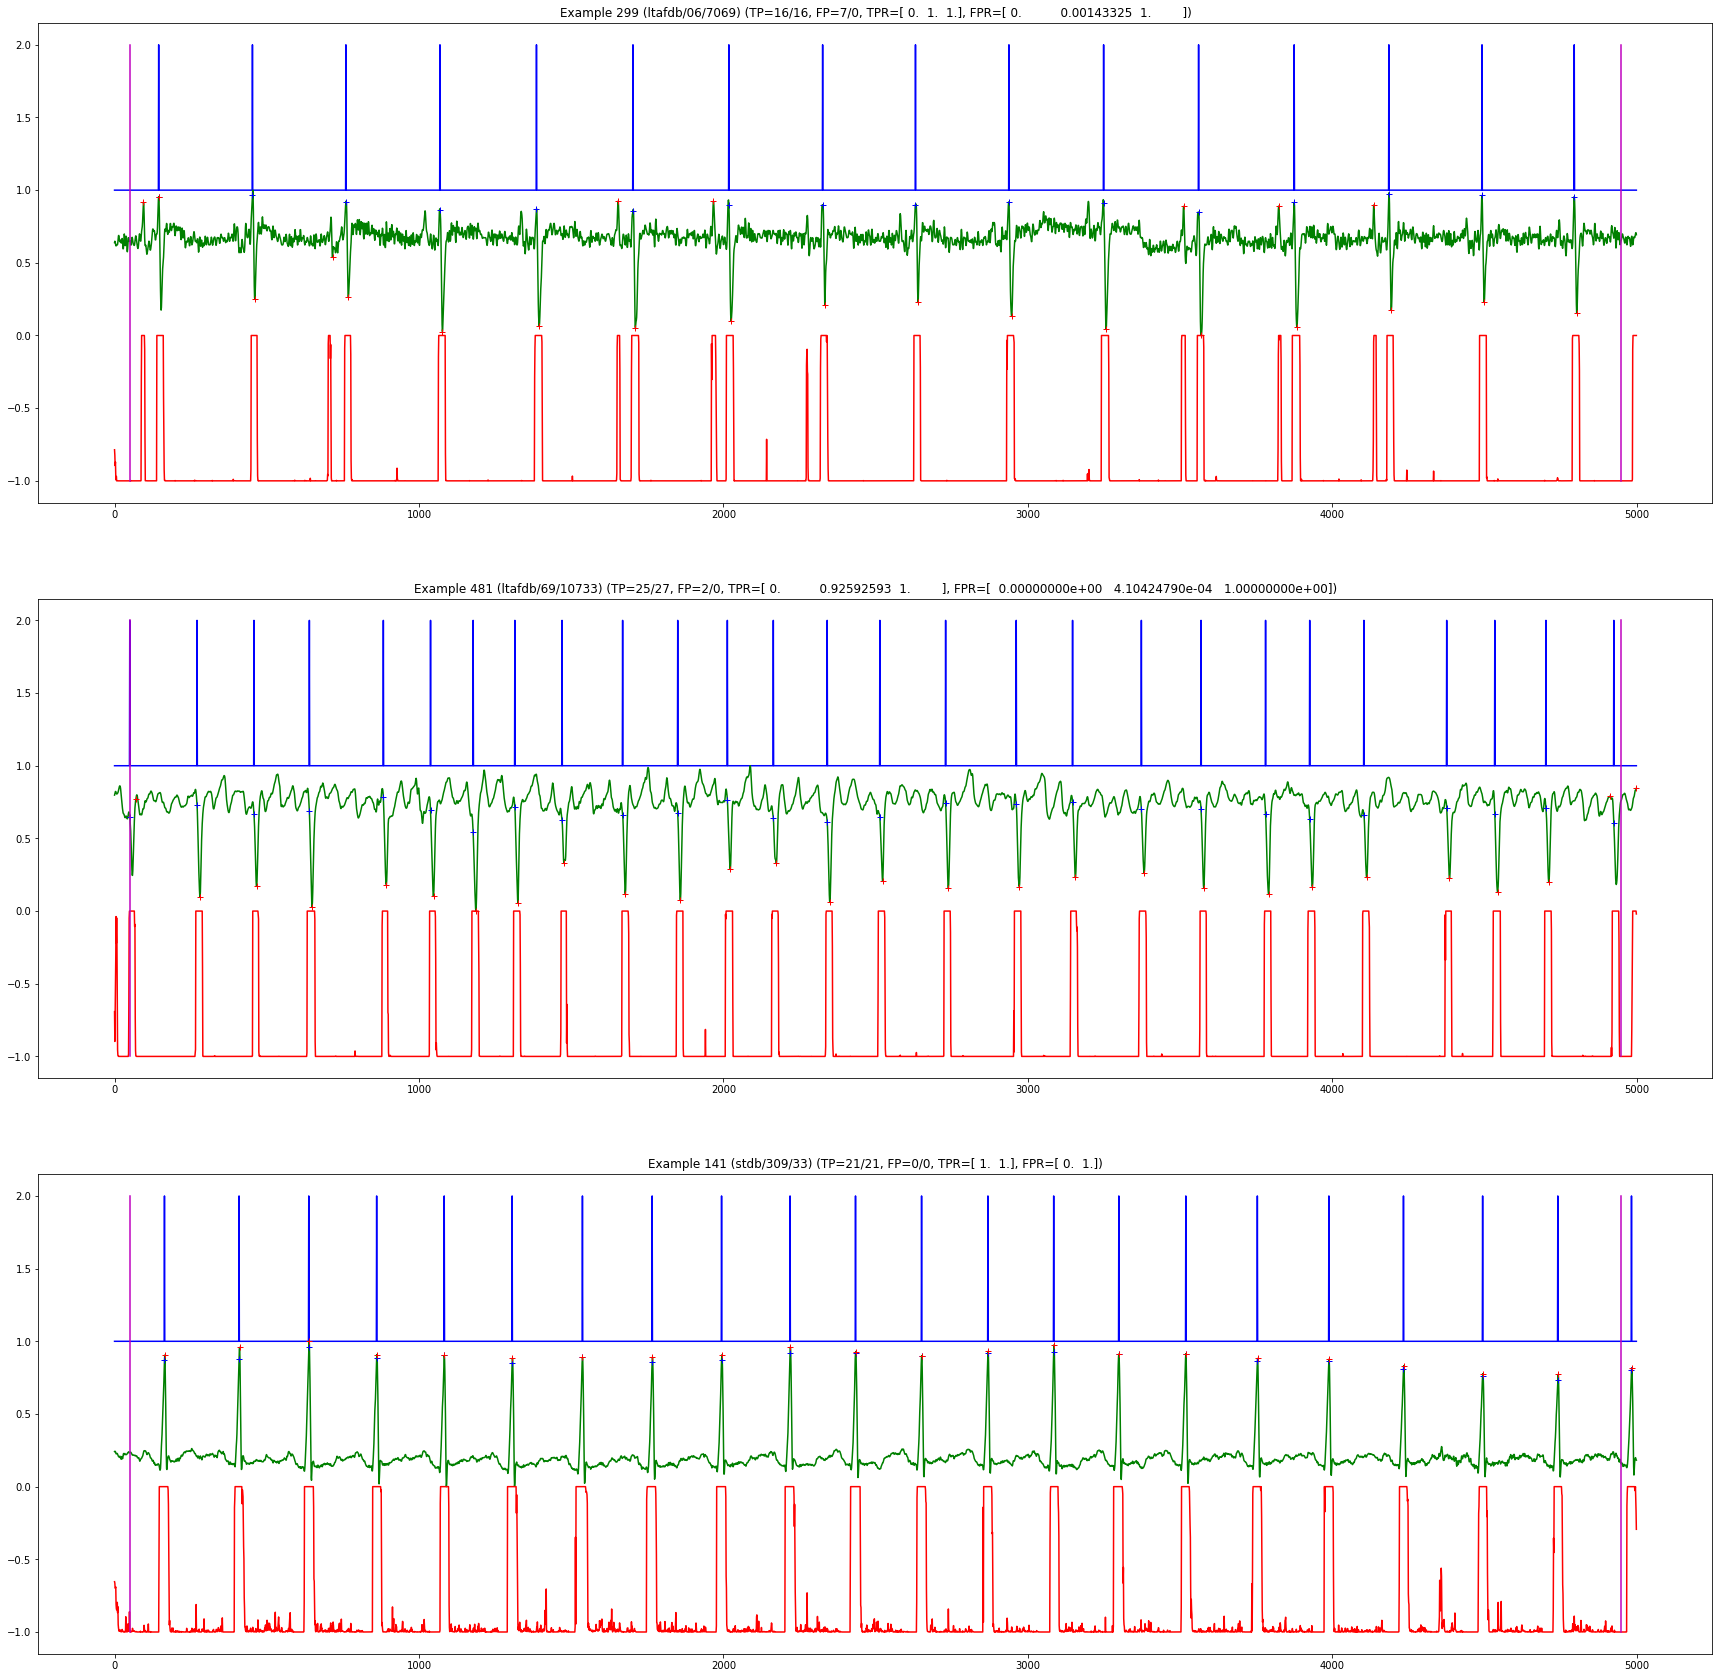

FPR			TPR			Threshold
0.007516		1.000000\+t	1.0000000


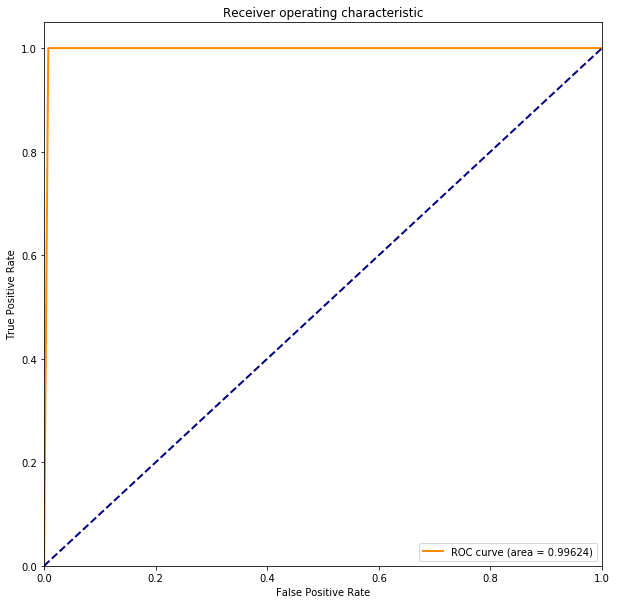

Samples:		14700 samples
Beats:
  - 64 labelized
  - 174 detected
  - TP:  64/64
  - FP:  110/0
  - TPR: 1.0000
Epoch 10/50 running...Done in 79.580s!
  - training loss:		0.458012
  - test loss:			0.219437 | 0.209561 | 0.428998
  - test accuracy:		99.6395 %


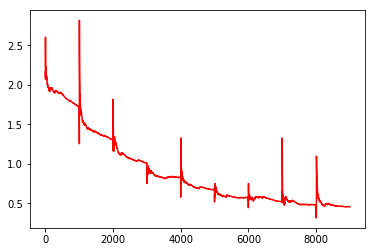

Evaluating...


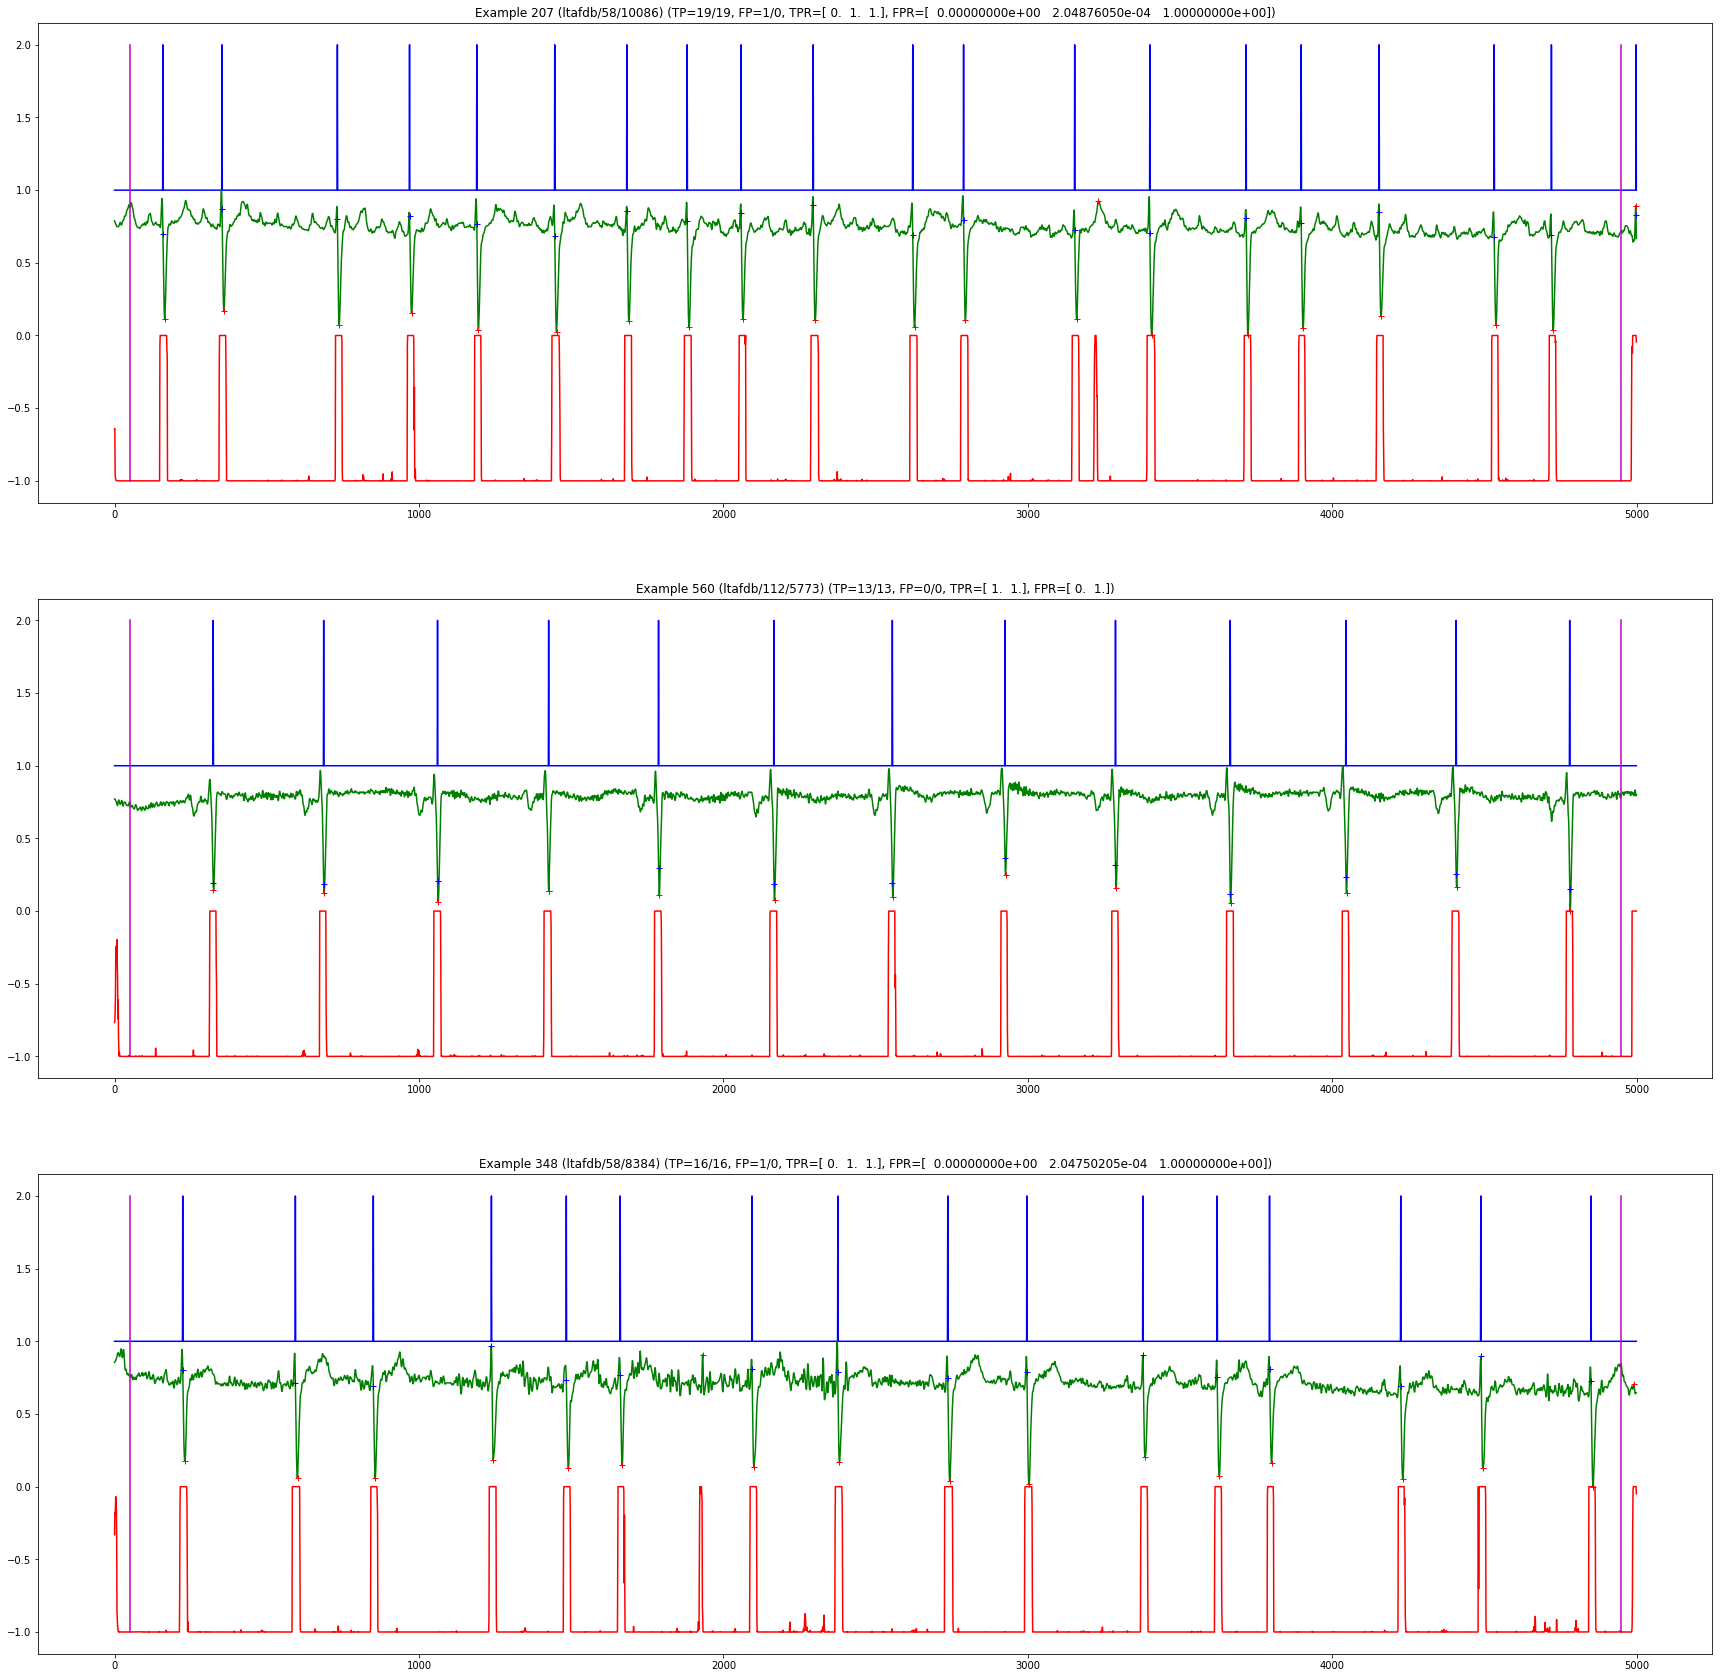

FPR			TPR			Threshold
0.001843		1.000000\+t	1.0000000


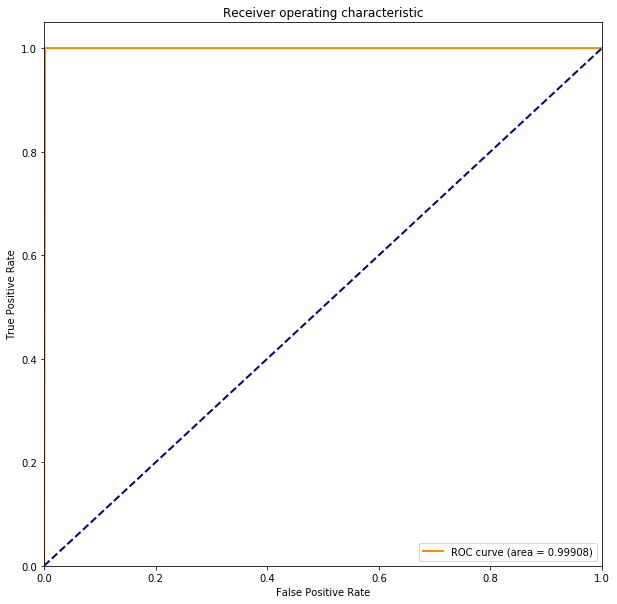

Samples:		14700 samples
Beats:
  - 48 labelized
  - 75 detected
  - TP:  48/48
  - FP:  27/0
  - TPR: 1.0000
Epoch 11/50 running...Done in 79.204s!
  - training loss:		0.386000
  - test loss:			0.218726 | 0.183274 | 0.402000
  - test accuracy:		99.6395 %


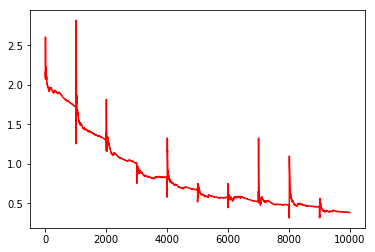

Evaluating...


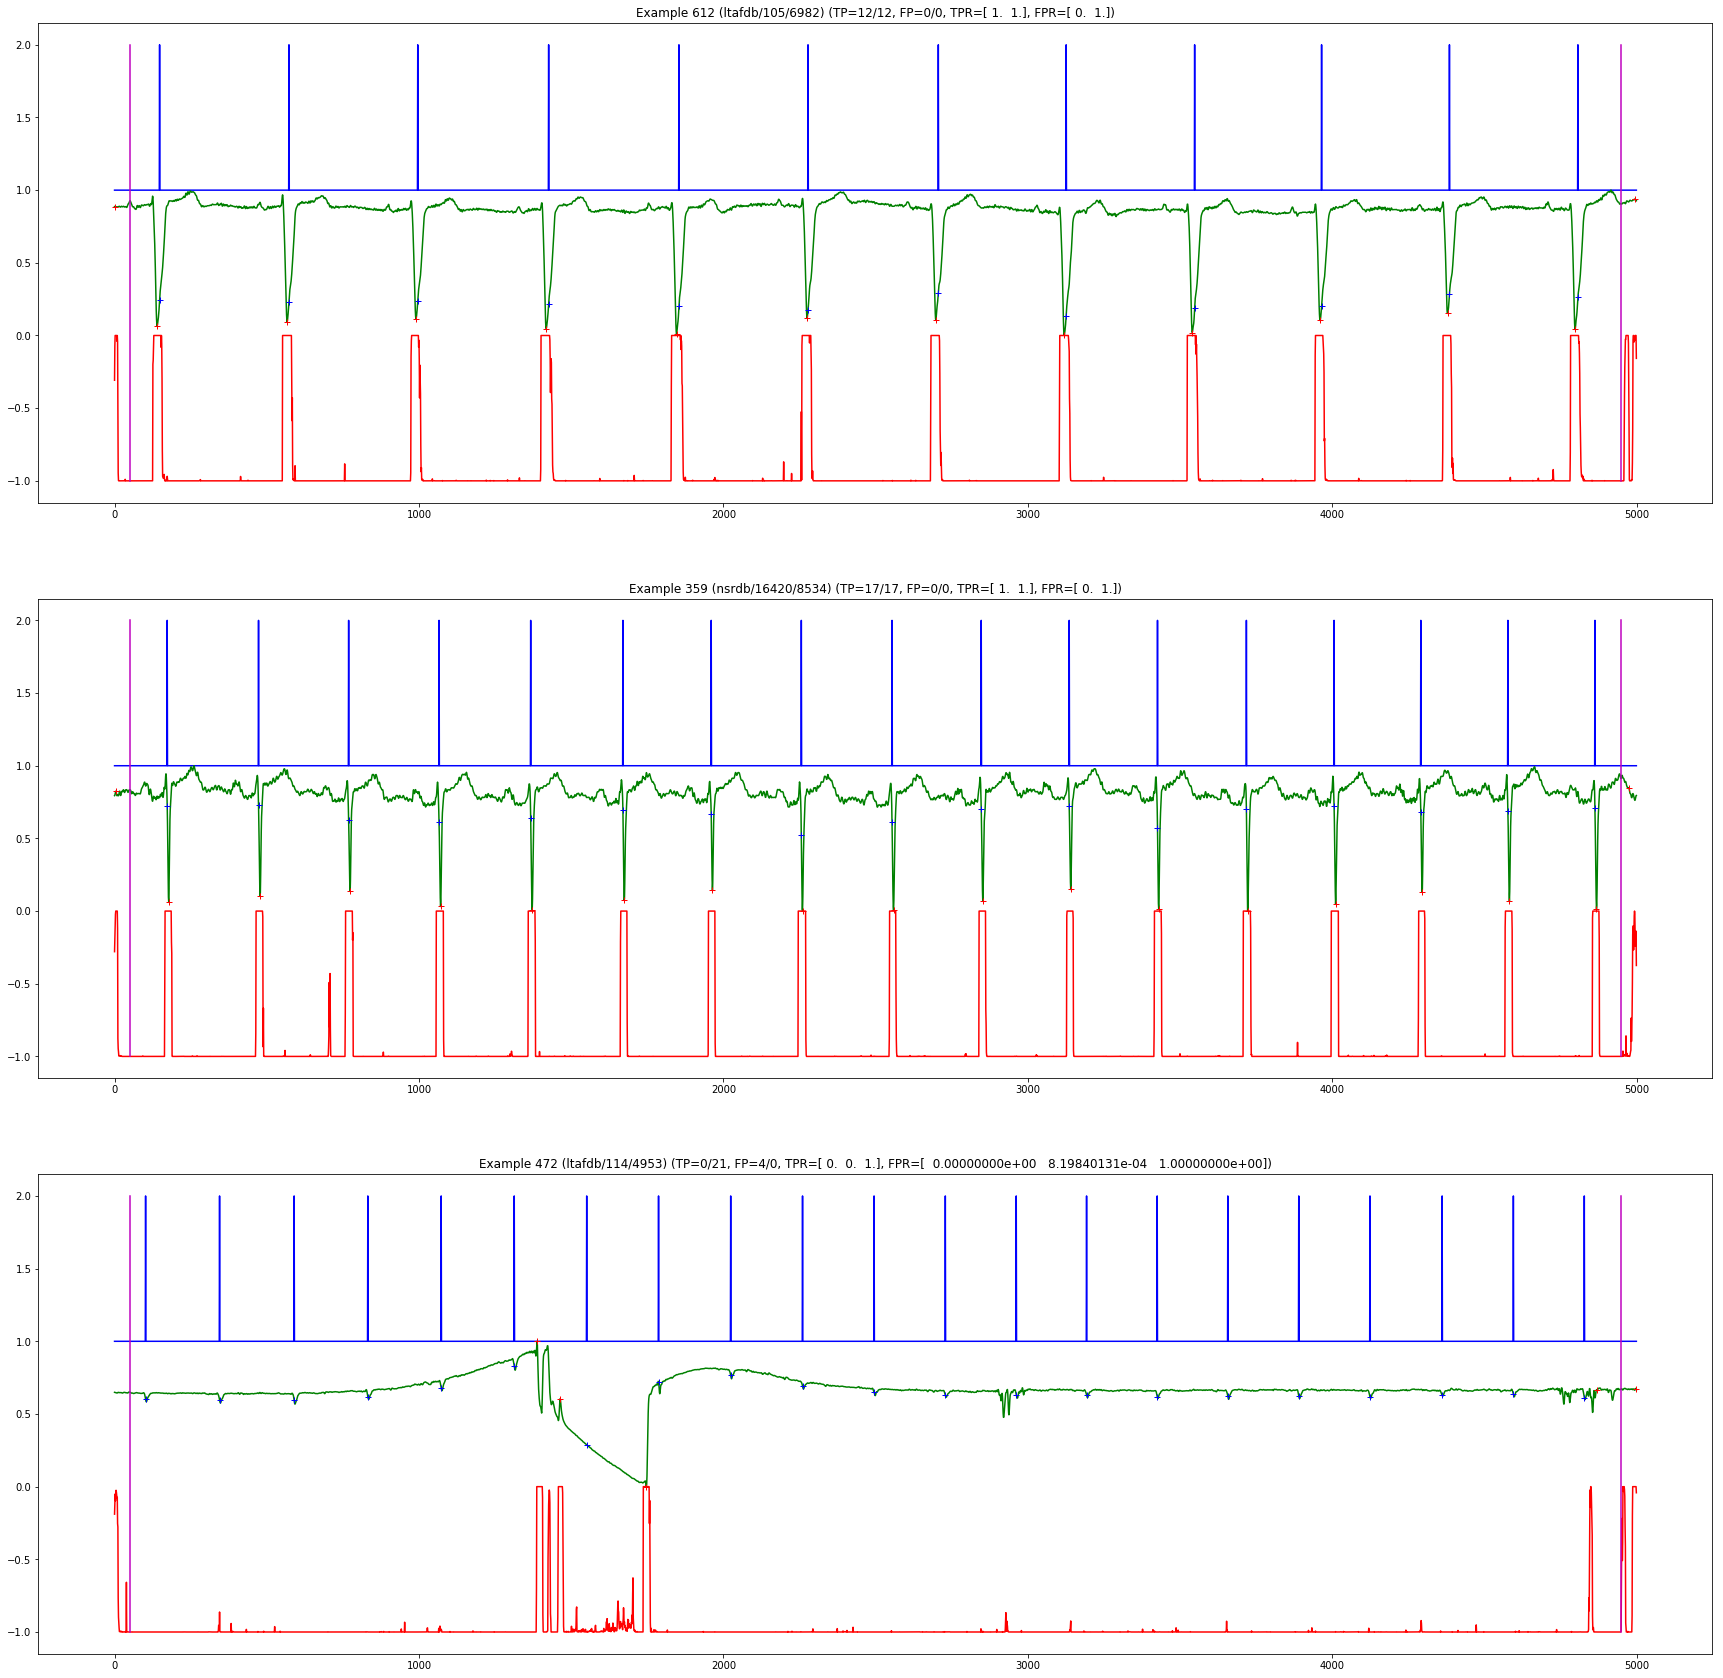

FPR			TPR			Threshold
0.010990		0.580000\+t	0.1390291


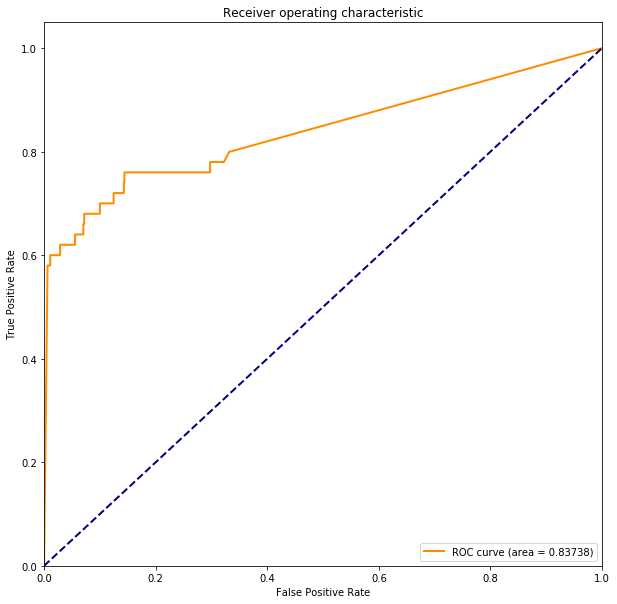

Samples:		14700 samples
Beats:
  - 50 labelized
  - 120 detected
  - TP:  29/50
  - FP:  91/0
  - TPR: 0.5800
Epoch 12/50 running...

In [ ]:
nn.train(train_exs, test_exs, num_epochs=50, examples_by_epoch=1000, data_dir=data_dir, save_name=save_name, eval_during_training=True)

In [ ]:
_, params = load_model(model_path + '/model-loss0.037631392673427445-epoch1200.sav')
# print(params)
set_all_param_values(nn.model, params)
nn.init_funs(nn.model)

In [ ]:
eval_model(testXY, nn.evaluate, left_border=left_border, right_border=right_border,
           min_gap=min_gap, max_gap=max_gap, plot_examples=True, nb=10,
           nearest_fpr=0.000675, threshold=0.9678147, eval_margin=10)